# **import necessary libraries**

In [2]:
# import necessary libraries
import pandas as pd
import numpy as np
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

In [3]:
# download necessary NLTK resources
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# **Install required libraries**

In [4]:
# Install required libraries
!pip install pyarabic
!pip install tashaphyne
!pip install pandas
!pip install sklearn
!pip install matplotlib


     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 251.5/251.5 kB 6.4 MB/s eta 0:00:0000:01
  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  √ó python setup.py egg_info did not run successfully.
  ‚îÇ exit code: 1
  ‚ï∞‚îÄ> [18 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, s

In [5]:
pip install emoji --upgrade


     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 356.3/356.3 kB 7.9 MB/s eta 0:00:0000:01
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.5.1-py2.py3-none-any.whl size=351223 sha256=dd0f309190a75f2288b104f2e2ace0681b319f38ee4ca34e0398753cee46543b
  Stored in directory: /root/.cache/pip/wheels/51/92/44/e2ef13f803aa08711819357e6de0c5fe67b874671141413565
Successfully built emoji
  Attempting uninstall: emoji
    Found existing installation: emoji 2.5.0
    Uninstalling emoji-2.5.0:
      Successfully uninstalled emoji-2.5.0
Note: you may need to restart the kernel to use updated packages.


In [6]:
# Import necessary libraries
import re
import pandas as pd
import matplotlib.pyplot as plt
from pyarabic.araby import strip_tashkeel
from tashaphyne.stemming import ArabicLightStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
# Add environment Packages paths to conda
import os, sys, warnings
import pandas as pd
import numpy as np
warnings.simplefilter("ignore")

# Text preprocessing packages
import nltk # Text libarary
# nltk.download('stopwords')
import string # Removing special characters {#, @, ...}
import re # Regex Package
import regex
import emoji
# Corpora is a group presenting multiple collections of text documents. A single collection is called corpus.
from nltk.corpus import stopwords # Stopwords
# import arabicstopwords.arabicstopwords as stp #more range of arabic stop words
from nltk.corpus import stopwords
stopwords_list = stopwords.words('arabic')
from nltk.stem.isri import ISRIStemmer
import pyarabic.araby as araby
from tashaphyne.stemming import ArabicLightStemmer

from nltk.stem import SnowballStemmer, WordNetLemmatizer # Stemmer & Lemmatizer
#from gensim.utils import simple_preprocess  # Text ==> List of Tokens

# Text Embedding
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Modelling
from sklearn.model_selection import train_test_split,KFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
from sklearn.svm import SVC
# Saving Model
import pickle

# Visualization Packages
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale=1.3)
%matplotlib inline

# **load the dataset**

In [7]:
# load the dataset
df = pd.read_csv("/kaggle/input/chat-gpt/chat_tweet_prr.csv")
df.head()

text  Sentiment
0  ÿ®Ÿàÿ™ŸäŸÖ ÿ™ÿ∑ŸÑŸÇ ÿ£ŸàŸÑ ŸÖŸÜÿµÿ© ÿπÿ±ÿ®Ÿäÿ© ŸÑŸÖÿ≠ÿßÿØÿ´ÿ© ÿßŸÑÿ∞ŸÉÿßÿ° ÿßŸÑÿßÿµÿ∑...        1.0
1  ŸÇŸàŸÇŸÑ ŸàÿßŸÑÿ∞ŸÉÿßÿ° ÿßŸÑÿµŸÜÿßÿπŸä ÿ¥ÿßÿ™ ÿ¨Ÿä ÿ®Ÿä ÿ™Ÿä ÿßŸÑÿßŸÜ ÿµÿßÿ±Ÿàÿß ŸÅ...        1.0
2  @nin8d ÿ≠ÿ™Ÿâ ÿßŸÜÿß ÿßÿ≥ÿ™ÿÆÿØŸÖ ÿ¥ÿßÿ™ ÿ¨Ÿä ÿ®Ÿä ÿ™Ÿä ÿ®ÿ≥ ÿßÿ¥ŸàŸÅ ÿßŸÑŸÜ...        0.0
3  @Medhat_Amer ÿßÿ≥ÿ™ÿßÿ∞ ŸÖÿØÿ≠ÿ™ .. ŸáŸÑ ÿ™ÿ±Ÿâ ÿßŸÜ ÿ¥ÿßÿ™ ÿ¨Ÿä ÿ®Ÿä...        0.0
4  ŸÖÿ™ÿßÿ¨ÿ± ÿßŸÑÿ™ÿ∑ÿ®ŸäŸÇÿßÿ™ ŸÅŸä  ÿßŸÑÿ£ŸäŸÅŸàŸÜ ŸàÿßŸÑÿ£ŸÜÿØÿ±ŸàŸäÿØ Ÿàÿ™ŸàŸÅÿ± ÿß...        1.0

In [8]:
#check if the data is balanced or not
df.Sentiment.value_counts()

1.0    1473
0.0     774
Name: Sentiment, dtype: int64

In [9]:
missing_count = df['Sentiment'].isnull().sum()
print("Missing value count:", missing_count)
df.dropna(subset=['Sentiment'], inplace=True)


Missing value count: 1


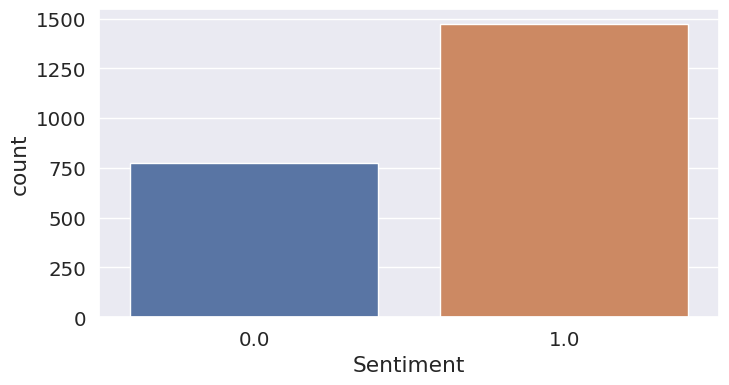

In [10]:
plt.figure(figsize=(8,4))
sns.countplot(x='Sentiment', data=df);

In [11]:
df = df.dropna(subset=['Sentiment'])


In [12]:
#print the number of null values in each column
df.isnull().sum()

text         0
Sentiment    0
dtype: int64

In [13]:
#to get the index of the null value
df[df['text'].isnull() == True]

Empty DataFrame
Columns: [text, Sentiment]
Index: []

In [14]:
#print the number of duplicated values
df.duplicated().sum()

24

In [15]:
#print the rows which are duplicated
df[df['text'].duplicated() == True]

text  Sentiment
19    ŸÖÿ™ÿßÿ¨ÿ± ÿßŸÑÿ™ÿ∑ÿ®ŸäŸÇÿßÿ™ ŸÅŸä  ÿßŸÑÿ£ŸäŸÅŸàŸÜ ŸàÿßŸÑÿ£ŸÜÿØÿ±ŸàŸäÿØ Ÿàÿ™ŸàŸÅÿ± ÿß...        1.0
20    ÿ≥ÿ£ŸÑŸÜÿß ÿ¥ÿßÿ™ ÿ¨Ÿä ÿ®Ÿä ÿ™Ÿä  ŸÉŸäŸÅ ŸÖŸÖŸÉŸÜ ŸÜÿ≥ÿ™ŸÅÿßÿØŸàÿß ŸÖŸÜŸá ŸÅŸä ÿ™...        1.0
21    ŸÖÿ≠ÿ™ÿßÿ¨ŸäŸÜ ŸÑŸáÿßŸÉÿßÿ´ŸàŸÜ ŸÅŸä ŸÑŸäÿ®Ÿäÿß ŸàŸÑŸà ŸÉÿßŸÜ ÿ£ŸÅÿ™ÿ±ÿßÿ∂Ÿä Ÿäÿ™ŸÖ ...        1.0
107   ÿØ.ÿÆÿßŸÑÿØ ÿßŸÑÿ∫ŸÜŸäŸÖ Ÿäÿπÿ∑Ÿä ŸÖÿ´ÿßŸÑ ÿπŸÑŸâ ÿπÿØŸÖ ŸÖÿµÿØÿßŸÇŸäÿ© ÿßŸÑŸÖÿπŸÑŸà...        0.0
579   #ChatGPT ŸÅŸä ÿßŸÑÿ≥ÿπŸàÿØŸäÿ©\n#openai\n#BingAI \n#chat...        1.0
929   ChatGPT-4 ÿ¥ÿßÿ™ ÿ¨Ÿä ÿ®Ÿä ÿ™Ÿä ŸÖŸÖŸäÿ≤ÿßÿ™ ÿ¨ÿØŸäÿØŸá ŸÅŸä ÿßŸÑÿßÿµÿØÿßÿ±...        1.0
930   ÿ¥ÿßÿ™ ÿ¨Ÿä ÿ®Ÿä ÿ™Ÿä 4 ÿ®ŸäÿØÿπŸÖ ÿßŸÑÿµŸàÿ±ÿå ŸàÿπŸÖŸÑŸàÿß ÿ™ÿ¨ÿ±ÿ®ÿ© ŸÅŸä ÿßŸÑ...        1.0
931   ÿ¥ÿßÿ™ ÿ¨Ÿä ÿ®Ÿä ÿ™Ÿä Ÿäÿ™ŸàŸÇÿπ ÿ®ŸÉÿ±Ÿâ ÿßŸÜŸáŸäÿßÿ± ŸÑŸÑÿ£ÿ≥ŸàÿßŸÇÿå ŸÜÿ™ÿßÿ®ÿπ ...        1.0
1131                ÿßÿ∑ŸÑÿ® ÿ≠ÿ≥ÿßÿ®ŸÉ ÿßŸÑÿßŸÜ! \n\n #ÿ¥ÿßÿ™_ÿ¨Ÿä_ÿ®Ÿä_ÿ™Ÿä        1.0
1468  Ÿäÿπÿ™ŸÇÿØ ŸÖÿÆÿ™ÿ±ÿπ ÿßŸÑÿ•ŸÜÿ™ÿ±ŸÜÿ™ ÿ™ŸäŸÖ ÿ®Ÿäÿ±ŸÜÿ±ÿ≤ ŸÑŸä ÿ£ŸÜ ŸÉŸÑ ŸÅÿ±ÿØ ŸÅ...        1.0
1576  ÿ¥ÿ®ŸáŸá ÿ®ÿ£ŸáŸÖŸäÿ© ÿßÿÆÿ™ÿ±ÿßÿπ ÿßŸÑÿ•ŸÜÿ™ÿ±ŸÜÿ™.. ÿ®ŸäŸÑ ÿ∫Ÿäÿ™ÿ≥ ŸäŸÖÿØÿ≠ ‚Äúÿ¥...        1.0
1611  ÿ¥ÿ®ŸáŸá ÿ®ÿ£ŸáŸÖŸäÿ© ÿßÿÆÿ™ÿ±ÿßÿπ ÿßŸÑÿ•ŸÜÿ™ÿ±ŸÜÿ™.. ÿ®ŸäŸÑ ÿ∫Ÿäÿ™ÿ≥ ŸäŸÖÿØÿ≠ ‚Äúÿ¥...        1.0
1612  ÿ±ŸàŸäÿ™ÿ±ÿ≤: ‚Äúÿ¥ÿßÿ™ ÿ¨Ÿä ÿ®Ÿä ÿ™Ÿä‚Äù ÿ£ÿ≥ÿ±ÿπ ÿßŸÑÿ™ÿ∑ÿ®ŸäŸÇÿßÿ™ ŸÜŸÖŸàÿß ŸÅŸä ...        1.0
1991  ŸÉŸäŸÅ ŸäŸÖŸÉŸÜŸÜŸä ÿßŸÑÿßÿ≥ÿ™ŸÅÿßÿØÿ© ŸÖŸÜ ŸÖŸàŸÇÿπ ÿ¥ÿßÿ™ ÿ¨Ÿä ÿ®Ÿä ÿ™Ÿä:\n\n...        1.0
1993  ŸÉŸäŸÅŸäÿ© ÿßÿ≥ÿ™ÿÆÿØÿßŸÖ ÿ¥ÿßÿ™ ÿ¨Ÿä ÿ®Ÿä ÿ™Ÿä ChatGPT :\n\nÿßÿ≥ÿ™ÿÆÿØÿß...        1.0
1994  ÿ®ÿπŸäÿØÿß ÿπŸÜ ÿßŸÑÿ™ÿπŸÇŸäÿØÿßÿ™ ÿßŸÑÿ™ŸÇŸÜŸäÿ© ŸÜÿπÿ±ŸÅ ŸÑŸÉ ÿ¥ÿßÿ™ ÿ¨Ÿä ÿ®Ÿä ÿ™...        1.0
1995  ÔøΩÔøΩÿ∑ÿ±ŸäŸÇÿ© ÿ•ÿ≥ÿ™ÿÆÿØÿßŸÖ ÿ¥ÿßÿ™ ÿ¨Ÿä ÿ®Ÿä ÿ™Ÿä ChatGPT  ŸÅŸä ŸÉÿ™ÿßÿ®ÿ©...        1.0
2156  ŸÖŸäŸÜ ÿ≠ŸäŸÇŸàŸÑ ŸÑŸÖÿ≠ŸÖÿØ ÿßŸÑŸÖÿ≥ŸÉŸäŸÜ ÿßŸÜŸä ŸÖÿ≥ŸÑŸÖ ÿ´ŸÑÿßÿ´ ÿ®Ÿäÿ®ÿ±ÿ≤ ŸÉŸÑ...        0.0
2157  ÿ£ÿπÿ±ÿ® ÿ£ŸÑÿ™ŸÖÿßŸÜ ŸÅŸä ÿ™ÿµÿ±Ÿäÿ≠ÿßÿ™ ŸÑŸÑÿµÿ≠ŸÅŸäŸÜ ÿÆŸÑÿßŸÑ ÿ≤Ÿäÿßÿ±ÿ™Ÿá ÿ•ŸÑŸâ...        1.0
2158  ¬´#ÿ¨ÿßŸÖÿπÿ©_ÿ£ÿ®Ÿàÿ∏ÿ®Ÿä¬ª ÿ™Ÿàÿ¨Ÿá ÿ®ÿßÿ≥ÿ™ÿÆÿØÿßŸÖ ÿ™ÿ∑ÿ®ŸäŸÇ ¬´ÿ¥ÿßÿ™ ÿ¨Ÿä ÿ®Ÿä...        1.0
2159  ÿßŸÑŸÖÿπÿßÿ±ÿ∂ÿ© ŸÑÿ®ÿ±ÿßŸÖÿ¨ ÿßŸÑÿ∞ŸÉÿßÿ° ÿßŸÑÿßÿµÿ∑ŸÜÿßÿπŸä ÿ™ÿ≤ÿØÿßÿØ .. ŸÖÿµÿßŸÑ...        0.0
2160  ÿ≥ŸäŸÜÿ≥ ÿ™ÿßŸäŸÖ ÿßŸÑÿµŸäŸÜŸäÿ© ÿ™ŸÉÿ¥ŸÅ ÿπŸÜ ŸÜŸÖŸàÿ∞ÿ¨ ŸÑŸÑÿ∞ŸÉÿßÿ° ÿßŸÑÿßÿµÿ∑ŸÜÿß...        0.0
2161  ŸÖŸÜÿßŸÅÿ≥ "ÿ¥ÿßÿ™ ÿ¨Ÿä ÿ®Ÿä ÿ™Ÿä".. ÿßŸÑÿµŸäŸÜ ÿ™ÿØÿÆŸÑ ÿ≥ÿ®ÿßŸÇ ÿßŸÑÿ∞ŸÉÿßÿ° ...        0.0
2163  ÿßŸÑÿ≠ŸÖÿØŸÑŸÑŸá ÿåÿå ÿ±ÿßÿ∂ŸäŸÜ ŸàŸÇŸÜŸàÿπŸäŸÜ ÿ®ŸÖÿß ŸÉÿ™ÿ®Ÿá ÿ±ÿ®Ÿä \n\nŸÉŸÜÿ™...        0.0
2166  ŸÖŸàÿ∏ŸÅŸàŸÜ ŸÅŸä ÿ≥ÿßŸÖÿ≥ŸàŸÜÿ∫ Ÿäÿ≥ÿ±ÿ®ŸàŸÜ ŸÖÿπŸÑŸàŸÖÿßÿ™ ÿ≥ÿ±Ÿäÿ© ÿ®ÿ≥ÿ®ÿ® ÿ∑ŸÑÿ®...        0.0
2234  @Medhat_Amer ÿßÿ≥ÿ™ÿßÿ∞ ŸÖÿØÿ≠ÿ™ .. ŸáŸÑ ÿ™ÿ±Ÿâ ÿßŸÜ ÿ¥ÿßÿ™ ÿ¨Ÿä ÿ®Ÿä...        0.0
2235  ÿ¥ÿßÿ™ ÿ¨Ÿä ÿ®Ÿä ÿ™Ÿä ÿ∫Ÿäÿ± ŸÖÿ™ÿßÿ≠ ŸÅŸä ÿßŸÑÿ≥ÿπŸàÿØŸäÿ©ÿå Ÿàÿßÿ∞ÿß ŸÇÿØÿ±ÿ™ ÿ™...        0.0
2236  ŸáŸäÿ¶ÿ© ÿ≠ŸÖÿßŸäÿ© ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ ÿßŸÑÿ•Ÿäÿ∑ÿßŸÑŸäÿ© ÿ™ÿπŸÑŸÜ ÿ≠ÿ∏ÿ± ÿ™ÿ∑ÿ®ŸäŸÇ ÿß...        0.0

In [16]:
df[df['text'] == df.iloc[76]['text']]

text  Sentiment
76  @96_null ŸáŸà ÿ¥ÿßÿ™ ÿ¨Ÿâ ÿ®Ÿâ ÿ™Ÿâ ŸÖŸÖŸÜŸàÿπ ŸÅŸâ ŸÖÿµÿ± ŸàŸÑÿß ÿ•ŸäŸá        0.0

In [17]:
#removing duplicated values
index = df[df['text'].duplicated() == True].index
df.drop(index, axis = 0, inplace = True)

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('arabic'))

#are there any stop words in the data?
arabic_stopwords = stopwords.words("arabic")
# len(arabic_stopwords)

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
df['stop_words'] = df['text'].apply(lambda x: len(set(x.split()) & set(arabic_stopwords)))
df.stop_words.value_counts()

2     432
3     400
4     254
5     219
1     212
6     189
7     168
8      91
9      80
0      73
10     38
11     28
12     15
13     12
14      6
17      1
16      1
Name: stop_words, dtype: int64

<Axes: ylabel='Frequency'>

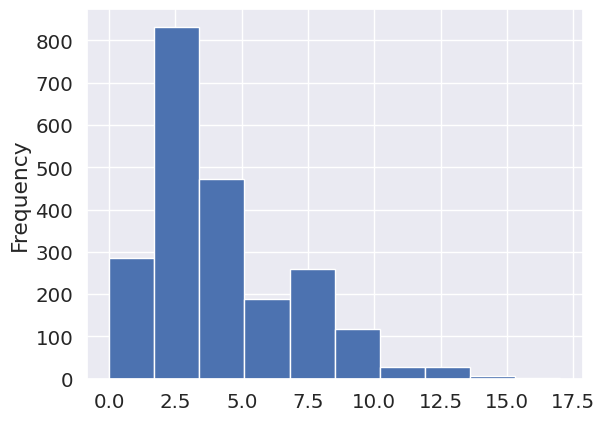

In [19]:
df['stop_words'].plot(kind= 'hist')

In [20]:
#to count the number of emojis in the dataset
def emoji_counter(sentence):
    return emoji.emoji_count(sentence)

df['emoji_count'] = df['text'].apply(lambda x: emoji_counter(x))
df.emoji_count.value_counts()[:10]

0     1886
1      205
2       69
3       36
4       10
8        4
7        3
5        2
6        2
23       1
Name: emoji_count, dtype: int64

# **extract the emojis from every text**

In [21]:
# print(emojis_data)
import pandas as pd
import regex
import emoji

def extract_emoji(text):
    emoji_list = []
    data = regex.findall(r'\X', text)
    for word in data:
        try:
            if any(emoji.distinct_emoji_list(char) for char in word):
                emoji_list.append(word)
        except IndexError:
            pass
    return emoji_list

emojis_data = df[df['emoji_count'] > 0]
emojis_data['emoji'] = emojis_data['text'].apply(lambda x: extract_emoji(x))
emojis_data['emoji'] = emojis_data['emoji'].apply(lambda x: ' '.join(word for word in x))

emojis_data


text  Sentiment  \
1     ŸÇŸàŸÇŸÑ ŸàÿßŸÑÿ∞ŸÉÿßÿ° ÿßŸÑÿµŸÜÿßÿπŸä ÿ¥ÿßÿ™ ÿ¨Ÿä ÿ®Ÿä ÿ™Ÿä ÿßŸÑÿßŸÜ ÿµÿßÿ±Ÿàÿß ŸÅ...        1.0   
2     @nin8d ÿ≠ÿ™Ÿâ ÿßŸÜÿß ÿßÿ≥ÿ™ÿÆÿØŸÖ ÿ¥ÿßÿ™ ÿ¨Ÿä ÿ®Ÿä ÿ™Ÿä ÿ®ÿ≥ ÿßÿ¥ŸàŸÅ ÿßŸÑŸÜ...        0.0   
15    @Eyaaaad @Hassanalsobhan ÿ≠ÿ®Ÿäÿ®Ÿä Ÿáÿ∞ÿß ÿ™ŸÅŸàŸÇ ÿπŸÑŸâ ÿ¥ÿß...        0.0   
16    ŸáŸà ÿ¥ÿßÿ™ ÿ¨Ÿä ÿ®Ÿä ÿ™Ÿä ÿØÿß ŸÖŸäÿπÿ±ŸÅÿ¥ Ÿäÿ∫Ÿäÿ± ÿßŸÑŸÖŸÑÿßŸäÿßÿ™ ŸàŸäÿ¥ÿ∑ÿ® ...        0.0   
33    ŸÑÿß ÿ™ÿ≥ÿ£ŸÑ ChatGPT ÿπŸÜ ÿ≠ŸÑŸàŸÑ ŸÑŸÖÿπÿßŸÜÿßÿ© ŸÜŸÅÿ≥Ÿäÿ© ÿ£Ÿà ŸÖÿ¥ŸÉŸÑÿ©...        0.0   
...                                                 ...        ...   
2216         @Ali_Albukhaiti Ÿáÿ∞ÿß ÿ¥ÿßÿ™ ÿ¨Ÿä ÿ®Ÿä ÿ™Ÿä ÿµÿ≠ŸàŸÜÿ¨Ÿä üòÇüòÇ        0.0   
2217  ÿßÿ≤ÿØŸäÿßÿØ ÿπŸÖŸÑŸäÿßÿ™ ÿßŸÑÿ®ÿ≠ÿ´ ŸÅŸä ÿ•Ÿäÿ∑ÿßŸÑŸäÿß ÿπŸÜ VPN ÿ®ÿπÿØ ÿ≠ÿ∏ÿ± ...        0.0   
2220  üî¥ ÿ¥ÿßÿ™ ÿ¨Ÿä ÿ®Ÿä ÿ™Ÿä GhatGPT\n\nüìå ŸÖŸÑÿÆÿµ ÿ¨ŸÖŸäŸÑ ÿπÿ¨ÿ®ŸÜŸä ŸÖŸÜ...        0.0   
2223  ŸÖŸàÿ∏ŸÅ ŸÅŸä ÿ≥ÿßŸÖÿ≥ŸàŸÜÿ¨ ÿßÿπÿ™ŸÖÿØ ÿπŸÑŸâ ÿ¥ÿßÿ™ ÿ¨Ÿä ÿ®Ÿä ÿ™Ÿä ŸÑÿ≠ŸÑ ŸÖÿ≥ÿß...        0.0   
2232  ÿ≥ÿ§ÿßŸÑ üôã ÿßŸäÿ¥ ŸäÿπŸÜŸä (ÿ∫ÿ®ŸÇÿ©) ÿüÿü \n\nŸÖŸÜ ÿ¨ÿØ ŸÖÿß ÿßÿπÿ±ŸÅ ŸÖÿß...        0.0   

      stop_words  emoji_count  emoji  
1              6            3  üëá üëá üëá  
2              5            1  üèÉüèª‚Äç‚ôÄÔ∏è  
15             4            2    ü§£ ü§£  
16             3            1      ü•∫  
33             9            1      üî¥  
...          ...          ...    ...  
2216           3            2    üòÇ üòÇ  
2217           5            1      üòé  
2220           8            3  üî¥ üìå üìå  
2223           6            1      üò¨  
2232           9            2    üôã üòÖ  

[333 rows x 5 columns]

In [22]:
#find most repeated emojis
pd.Series(' '.join(emojis_data['emoji']).split()).value_counts()[:10]

üòÇ     84
üëá     59
ü§ñ     22
ü§£     20
‚ñ™     17
üëáüèª    15
üò≠     13
üî•     13
üòÖ     12
‚ñ™Ô∏è    12
dtype: int64

# **Cleaning**

In [23]:
emojis = {
    "üôÇ":"Ÿäÿ®ÿ™ÿ≥ŸÖ",
    "‚ñ™Ô∏è":"ŸÖÿ±ÿ®ÿπ",
    "ü§£":"Ÿäÿ∂ÿ≠ŸÉ",
    "ü§ñ":"ÿ±Ÿàÿ®Ÿàÿ™",
    "‚ñ™":"ŸÖÿ±ÿ®ÿπ",
    "üòÇ":"Ÿäÿ∂ÿ≠ŸÉ",
    "üíî":"ŸÇŸÑÿ® ÿ≠ÿ≤ŸäŸÜ",
    "üôÇ":"Ÿäÿ®ÿ™ÿ≥ŸÖ",
    "‚ù§Ô∏è":"ÿ≠ÿ®",
    "‚ù§":"ÿ≠ÿ®",
    "üòç":"ÿ≠ÿ®",
    "üò≠":"Ÿäÿ®ŸÉŸä",
    "üò¢":"ÿ≠ÿ≤ŸÜ",
    "üòî":"ÿ≠ÿ≤ŸÜ",
    "‚ô•":"ÿ≠ÿ®",
    "üíú":"ÿ≠ÿ®",
    "üòÖ":"Ÿäÿ∂ÿ≠ŸÉ",
    "üôÅ":"ÿ≠ÿ≤ŸäŸÜ",
    "üíï":"ÿ≠ÿ®",
    "üíô":"ÿ≠ÿ®",
    "üòû":"ÿ≠ÿ≤ŸäŸÜ",
    "üòä":"ÿ≥ÿπÿßÿØÿ©",
    "üëè":"ŸäÿµŸÅŸÇ",
    "üëå":"ÿßÿ≠ÿ≥ŸÜÿ™",
    "üò¥":"ŸäŸÜÿßŸÖ",
    "üòÄ":"Ÿäÿ∂ÿ≠ŸÉ",
    "üòå":"ÿ≠ÿ≤ŸäŸÜ",
    "üåπ":"Ÿàÿ±ÿØÿ©",
    "üôà":"ÿ≠ÿ®",
    "üòÑ":"Ÿäÿ∂ÿ≠ŸÉ",
    "üòê":"ŸÖÿ≠ÿßŸäÿØ",
    "‚úå":"ŸÖŸÜÿ™ÿµÿ±",
    "‚ú®":"ŸÜÿ¨ŸÖŸá",
    "ü§î":"ÿ™ŸÅŸÉŸäÿ±",
    "üòè":"Ÿäÿ≥ÿ™Ÿáÿ≤ÿ°",
    "üòí":"Ÿäÿ≥ÿ™Ÿáÿ≤ÿ°",
    "üôÑ":"ŸÖŸÑŸÑ",
    "üòï":"ÿπÿµÿ®Ÿäÿ©",
    "üòÉ":"Ÿäÿ∂ÿ≠ŸÉ",
    "üå∏":"Ÿàÿ±ÿØÿ©",
    "üòì":"ÿ≠ÿ≤ŸÜ",
    "üíû":"ÿ≠ÿ®",
    "üíó":"ÿ≠ÿ®",
    "üòë":"ŸÖŸÜÿ≤ÿπÿ¨",
    "üí≠":"ÿ™ŸÅŸÉŸäÿ±",
    "üòé":"ÿ´ŸÇÿ©",
    "üíõ":"ÿ≠ÿ®",
    "üò©":"ÿ≠ÿ≤ŸäŸÜ",
    "üí™":"ÿπÿ∂ŸÑÿßÿ™",
    "üëç":"ŸÖŸàÿßŸÅŸÇ",
    "üôèüèª":"ÿ±ÿ¨ÿßÿ° ÿ∑ŸÑÿ®",
    "üò≥":"ŸÖÿµÿØŸàŸÖ",
    "üëèüèº":"ÿ™ÿµŸÅŸäŸÇ",
    "üé∂":"ŸÖŸàÿ≥ŸäŸÇŸä",
    "üåö":"ÿµŸÖÿ™",
    "üíö":"ÿ≠ÿ®",
    "üôè":"ÿ±ÿ¨ÿßÿ° ÿ∑ŸÑÿ®",
    "üíò":"ÿ≠ÿ®",
    "üçÉ":"ÿ≥ŸÑÿßŸÖ",
    "‚ò∫":"Ÿäÿ∂ÿ≠ŸÉ",
    "üê∏":"ÿ∂ŸÅÿØÿπ",
    "üò∂":"ŸÖÿµÿØŸàŸÖ",
    "‚úåÔ∏è":"ŸÖÿ±ÿ≠",
    "‚úãüèª":"ÿ™ŸàŸÇŸÅ",
    "üòâ":"ÿ∫ŸÖÿ≤ÿ©",
    "üå∑":"ÿ≠ÿ®",
    "üôÉ":"ŸÖÿ®ÿ™ÿ≥ŸÖ",
    "üò´":"ÿ≠ÿ≤ŸäŸÜ",
    "üò®":"ŸÖÿµÿØŸàŸÖ",
    "üéº ":"ŸÖŸàÿ≥ŸäŸÇŸä",
    "üçÅ":"ŸÖÿ±ÿ≠",
    "üçÇ":"ŸÖÿ±ÿ≠",
    "üíü":"ÿ≠ÿ®",
    "üò™":"ÿ≠ÿ≤ŸÜ",
    "üòÜ":"Ÿäÿ∂ÿ≠ŸÉ",
    "üò£":"ÿßÿ≥ÿ™Ÿäÿßÿ°",
    "‚ò∫Ô∏è":"ÿ≠ÿ®",
    "üò±":"ŸÉÿßÿ±ÿ´ÿ©",
    "üòÅ":"Ÿäÿ∂ÿ≠ŸÉ",
    "üòñ":"ÿßÿ≥ÿ™Ÿäÿßÿ°",
    "üèÉüèº":"Ÿäÿ¨ÿ±Ÿä",
    "üò°":"ÿ∫ÿ∂ÿ®",
    "üö∂":"Ÿäÿ≥Ÿäÿ±",
    "ü§ï":"ŸÖÿ±ÿ∂",
    "‚ÄºÔ∏è":"ÿ™ÿπÿ¨ÿ®",
    "üïä":"ÿ∑ÿßÿ¶ÿ±",
    "üëåüèª":"ÿßÿ≠ÿ≥ŸÜÿ™",
    "‚ù£":"ÿ≠ÿ®",
    "üôä":"ŸÖÿµÿØŸàŸÖ",
    "üíÉ":"ÿ≥ÿπÿßÿØÿ© ŸÖÿ±ÿ≠",
    "üíÉüèº":"ÿ≥ÿπÿßÿØÿ© ŸÖÿ±ÿ≠",
    "üòú":"ŸÖÿ±ÿ≠",
    "üëä":"ÿ∂ÿ±ÿ®ÿ©",
    "üòü":"ÿßÿ≥ÿ™Ÿäÿßÿ°",
    "üíñ":"ÿ≠ÿ®",
    "üò•":"ÿ≠ÿ≤ŸÜ",
    "üéª":"ŸÖŸàÿ≥ŸäŸÇŸä",
    "‚úí":"ŸäŸÉÿ™ÿ®",
    "üö∂üèª":"Ÿäÿ≥Ÿäÿ±",
    "üíé":"ÿßŸÑŸÖÿßÿ∏",
    "üò∑":"Ÿàÿ®ÿßÿ° ŸÖÿ±ÿ∂",
    "‚òù":"Ÿàÿßÿ≠ÿØ",
    "üö¨":"ÿ™ÿØÿÆŸäŸÜ",
    "üíê" : "Ÿàÿ±ÿØ",
    "üåû" : "ÿ¥ŸÖÿ≥",
    "üëÜ" : "ÿßŸÑÿßŸàŸÑ",
    "‚ö†Ô∏è" :"ÿ™ÿ≠ÿ∞Ÿäÿ±",
    "ü§ó" : "ÿßÿ≠ÿ™Ÿàÿßÿ°",
    "‚úñÔ∏è": "ÿ∫ŸÑÿ∑",
    "üìç"  : "ŸÖŸÉÿßŸÜ",
    "üë∏" : "ŸÖŸÑŸÉŸá",
    "üëë" : "ÿ™ÿßÿ¨",
    "‚úîÔ∏è" : "ÿµÿ≠",
    "üíå": "ŸÇŸÑÿ®",
    "üò≤" : "ŸÖŸÜÿØŸáÿ¥",
    "üí¶": "ŸÖÿßÿ°",
    "üö´" : "ÿÆÿ∑ÿß",
    "üëèüèª" : "ÿ®ÿ±ÿßŸÅŸà",
    "üèä" :"Ÿäÿ≥ÿ®ÿ≠",
    "üëçüèª": "ÿ™ŸÖÿßŸÖ",
    "‚≠ïÔ∏è" :"ÿØÿßÿ¶ÿ±Ÿá ŸÉÿ®Ÿäÿ±Ÿá",
    "üé∑" : "ÿ≥ÿßŸÉÿ≥ŸÅŸàŸÜ",
    "üëã": "ÿ™ŸÑŸàŸäÿ≠ ÿ®ÿßŸÑŸäÿØ",
    "‚úåüèº": "ÿπŸÑÿßŸÖŸá ÿßŸÑŸÜÿµÿ±",
    "üåù":"ŸÖÿ®ÿ™ÿ≥ŸÖ",
    "‚ûø"  : "ÿπŸÇÿØŸá ŸÖÿ≤ÿØŸàÿ¨Ÿá",
    "üí™üèº" : "ŸÇŸàŸä",
    "üì©":  "ÿ™ŸàÿßÿµŸÑ ŸÖÿπŸä",
    "‚òïÔ∏è": "ŸÇŸáŸàŸá",
    "üòß" : "ŸÇŸÑŸÇ Ÿà ÿµÿØŸÖÿ©",
    "üó®": "ÿ±ÿ≥ÿßŸÑÿ©",
    "‚ùóÔ∏è" :"ÿ™ÿπÿ¨ÿ®",
    "üôÜüèª": "ÿßÿ¥ÿßÿ±Ÿá ŸÖŸàÿßŸÅŸÇŸá",
    "üëØ" :"ÿßÿÆŸàÿßÿ™",
    "¬©" :  "ÿ±ŸÖÿ≤",
    "üëµüèΩ" :"ÿ≥ŸäÿØŸá ÿπÿ¨Ÿàÿ≤Ÿá",
    "üê£": "ŸÉÿ™ŸÉŸàÿ™",
    "üôå": "ÿ™ÿ¥ÿ¨Ÿäÿπ",
    "üôá": "ÿ¥ÿÆÿµ ŸäŸÜÿ≠ŸÜŸä",
    "üëêüèΩ":"ÿßŸäÿØŸä ŸÖŸÅÿ™Ÿàÿ≠Ÿá",
    "üëåüèΩ": "ÿ®ÿßŸÑÿ∏ÿ®ÿ∑",
    "‚ÅâÔ∏è" : "ÿßÿ≥ÿ™ŸÜŸÉÿßÿ±",
    "‚öΩÔ∏è": "ŸÉŸàÿ±Ÿá",
    "üï∂" :"ÿ≠ÿ®",
    "üéà" :"ÿ®ÿßŸÑŸàŸÜ",
    "üéÄ":    "Ÿàÿ±ÿØŸá",
    "üíµ":  "ŸÅŸÑŸàÿ≥",
    "üòã":  "ÿ¨ÿßÿ¶ÿπ",
    "üòõ":  "Ÿäÿ∫Ÿäÿ∏",
    "üò†":  "ÿ∫ÿßÿ∂ÿ®",
    "‚úçüèª":  "ŸäŸÉÿ™ÿ®",
    "üåæ":  "ÿßÿ±ÿ≤",
    "üë£":  "ÿßÿ´ÿ± ŸÇÿØŸÖŸäŸÜ",
    "‚ùå":"ÿ±ŸÅÿ∂",
    "üçü":"ÿ∑ÿπÿßŸÖ",
    "üë¨":"ÿµÿØÿßŸÇÿ©",
    "üê∞":"ÿßÿ±ŸÜÿ®",
    "‚òÇ":"ŸÖÿ∑ÿ±",
    "‚öú":"ŸÖŸÖŸÑŸÉÿ© ŸÅÿ±ŸÜÿ≥ÿß",
    "üêë":"ÿÆÿ±ŸàŸÅ",
    "üó£":"ÿµŸàÿ™ ŸÖÿ±ÿ™ŸÅÿπ",
    "üëåüèº":"ÿßÿ≠ÿ≥ŸÜÿ™",
    "‚òò":"ŸÖÿ±ÿ≠",
    "üòÆ":"ÿµÿØŸÖÿ©",
    "üò¶":"ŸÇŸÑŸÇ",
    "‚≠ï":"ÿßŸÑÿ≠ŸÇ",
    "‚úèÔ∏è":"ŸÇŸÑŸÖ",
    "‚Ñπ":"ŸÖÿπŸÑŸàŸÖÿßÿ™",
    "üôçüèª":"ÿ±ŸÅÿ∂",
    "‚ö™Ô∏è":"ŸÜÿ∂ÿßÿ±ÿ© ŸÜŸÇÿßÿ°",
    "üê§":"ÿ≠ÿ≤ŸÜ",
    "üí´":"ŸÖÿ±ÿ≠",
    "üíù":"ÿ≠ÿ®",
    "üçî":"ÿ∑ÿπÿßŸÖ",
    "‚ù§Ô∏é":"ÿ≠ÿ®",
    "‚úàÔ∏è":"ÿ≥ŸÅÿ±",
    "üèÉüèª‚Äç‚ôÄÔ∏è":"Ÿäÿ≥Ÿäÿ±",
    "üç≥":"ÿ∞ŸÉÿ±",
    "üé§":"ŸÖÿßŸäŸÉ ÿ∫ŸÜÿßÿ°",
    "üéæ":"ŸÉÿ±Ÿá",
    "üêî":"ÿØÿ¨ÿßÿ¨ÿ©",
    "üôã":"ÿ≥ÿ§ÿßŸÑ",
    "üìÆ":"ÿ®ÿ≠ÿ±",
    "üíâ":"ÿØŸàÿßÿ°",
    "üôèüèº":"ÿ±ÿ¨ÿßÿ° ÿ∑ŸÑÿ®",
    "üíÇüèø ":"ÿ≠ÿßÿ±ÿ≥",
    "üé¨":"ÿ≥ŸäŸÜŸÖÿß",
    "‚ô¶Ô∏è":"ŸÖÿ±ÿ≠",
    "üí°":"ŸÇŸÉÿ±ÿ©",
    "‚Äº":"ÿ™ÿπÿ¨ÿ®",
    "üëº":"ÿ∑ŸÅŸÑ",
    "üîë":"ŸÖŸÅÿ™ÿßÿ≠",
    "‚ô•Ô∏è":"ÿ≠ÿ®",
    "üïã":"ŸÉÿπÿ®ÿ©",
    "üêì":"ÿØÿ¨ÿßÿ¨ÿ©",
    "üí©":"ŸÖÿπÿ™ÿ±ÿ∂",
    "üëΩ":"ŸÅÿ∂ÿßÿ¶Ÿä",
    "‚òîÔ∏è":"ŸÖÿ∑ÿ±",
    "üç∑":"ÿπÿµŸäÿ±",
    "üåü":"ŸÜÿ¨ŸÖÿ©",
    "‚òÅÔ∏è":"ÿ≥ÿ≠ÿ®",
    "üëÉ":"ŸÖÿπÿ™ÿ±ÿ∂",
    "üå∫":"ŸÖÿ±ÿ≠",
    "üî™":"ÿ≥ŸÉŸäŸÜÿ©",
    "‚ô®":"ÿ≥ÿÆŸàŸÜŸäÿ©",
    "üëäüèº":"ÿ∂ÿ±ÿ®",
    "‚úè":"ŸÇŸÑŸÖ",
    "üö∂üèæ‚Äç‚ôÄÔ∏è":"Ÿäÿ≥Ÿäÿ±",
    "üëä":"ÿ∂ÿ±ÿ®ÿ©",
    "‚óæÔ∏è":"ŸàŸÇŸÅ",
    "üòö":"ÿ≠ÿ®",
    "üî∏":"ŸÖÿ±ÿ≠",
    "üëéüèª":"ŸÑÿß Ÿäÿπÿ¨ÿ®ŸÜŸä",
    "üëäüèΩ":"ÿ∂ÿ±ÿ®ÿ©",
    "üòô":"ÿ≠ÿ®",
    "üé•":"ÿ™ÿµŸàŸäÿ±",
    "üëâ":"ÿ¨ÿ∞ÿ® ÿßŸÜÿ™ÿ®ÿßŸá",
    "üëèüèΩ":"ŸäÿµŸÅŸÇ",
    "üí™üèª":"ÿπÿ∂ŸÑÿßÿ™",
    "üè¥":"ÿßÿ≥ŸàÿØ",
    "üî•":"ÿ≠ÿ±ŸäŸÇ",
    "üò¨":"ÿπÿØŸÖ ÿßŸÑÿ±ÿßÿ≠ÿ©",
    "üëäüèø":"Ÿäÿ∂ÿ±ÿ®",
    "üåø":"Ÿàÿ±ŸÇŸá ÿ¥ÿ¨ÿ±Ÿá",
    "‚úãüèº":"ŸÉŸÅ ÿßŸäÿØ",
    "üëê":"ÿßŸäÿØŸä ŸÖŸÅÿ™Ÿàÿ≠Ÿá",
    "‚ò†Ô∏è":"Ÿàÿ¨Ÿá ŸÖÿ±ÿπÿ®",
    "üéâ":"ŸäŸáŸÜÿ¶",
    "üîï" :"ÿµÿßŸÖÿ™",
    "üòø":"Ÿàÿ¨Ÿá ÿ≠ÿ≤ŸäŸÜ",
    "‚òπÔ∏è":"Ÿàÿ¨Ÿá Ÿäÿßÿ¶ÿ≥",
    "üòò" :"ÿ≠ÿ®",
    "üò∞" :"ÿÆŸàŸÅ Ÿà ÿ≠ÿ≤ŸÜ",
    "üåº":"Ÿàÿ±ÿØŸá",
    "üíã":  "ÿ®Ÿàÿ≥Ÿá",
    "üëá":"ŸÑÿßÿ≥ŸÅŸÑ",
    "‚ù£Ô∏è":"ÿ≠ÿ®",
    "üéß":"ÿ≥ŸÖÿßÿπÿßÿ™",
    "üìù":"ŸäŸÉÿ™ÿ®",
    "üòá":"ÿØÿßŸäÿÆ",
    "üòà":"ÿ±ÿπÿ®",
    "üèÉ":"Ÿäÿ¨ÿ±Ÿä",
    "‚úåüèª":"ÿπŸÑÿßŸÖŸá ÿßŸÑŸÜÿµÿ±",
    "üî´":"Ÿäÿ∂ÿ±ÿ®",
    "‚ùóÔ∏è":"ÿ™ÿπÿ¨ÿ®",
    "üëé":"ÿ∫Ÿäÿ± ŸÖŸàÿßŸÅŸÇ",
    "üîê":"ŸÇŸÅŸÑ",
    "üëà":"ŸÑŸÑŸäŸÖŸäŸÜ",
    "‚Ñ¢":"ÿ±ŸÖÿ≤",
    "üö∂üèΩ":"Ÿäÿ™ŸÖÿ¥Ÿä",
    "üòØ":"ŸÖÿ™ŸÅÿßÿ¨ÿ£",
    "‚úä":"ŸäÿØ ŸÖÿ∫ŸÑŸÇŸá",
    "üòª":"ÿßÿπÿ¨ÿßÿ®",
    "üôâ" :"ŸÇÿ±ÿØ",
    "üëß":"ÿ∑ŸÅŸÑŸá ÿµÿ∫Ÿäÿ±Ÿá",
    "üî¥":"ÿØÿßÿ¶ÿ±Ÿá ÿ≠ŸÖÿ±ÿßÿ°",
    "üí™üèΩ":"ŸÇŸàŸá",
    "üí§":"ŸäŸÜÿßŸÖ",
    "üëÄ":"ŸäŸÜÿ∏ÿ±",
    "‚úçüèª":"ŸäŸÉÿ™ÿ®",
    "‚ùÑÔ∏è":"ÿ™ŸÑÿ¨",
    "üíÄ":"ÿ±ÿπÿ®",
    "üò§":"Ÿàÿ¨Ÿá ÿπÿßÿ®ÿ≥",
    "üñã":"ŸÇŸÑŸÖ",
    "üé©":"ŸÉÿßÿ®",
    "‚òïÔ∏è":"ŸÇŸáŸàŸá",
    "üòπ":"ÿ∂ÿ≠ŸÉ",
    "üíì":"ÿ≠ÿ®",
    "‚òÑÔ∏è ":"ŸÜÿßÿ±",
    "üëª":"ÿ±ÿπÿ®",
    }

emoticons_to_emoji = {
    ":)" : "üôÇ",
    ":(" : "üôÅ",
    "xD" : "üòÜ",
    ":=(": "üò≠",
    ":'(": "üò¢",
    ":'‚Äë(": "üò¢",
    "XD" : "üòÇ",
    ":D" : "üôÇ",
    "‚ô¨" : "ŸÖŸàÿ≥ŸäŸÇŸä",
    "‚ô°" : "‚ù§",
    "‚òª"  : "üôÇ",
    }

In [24]:
def remove_stop_words(text):
    Text=[i for i in str(text).split() if i not in arabic_stopwords]
    return " ".join(Text)

def ISRI_Stemmer(text):
    #making an object
    stemmer = ISRIStemmer()

    #stemming each word
    text = stemmer.stem(text)
    text = stemmer.pre32(text)
    text = stemmer.suf32(text)

    return text

def Snowball_stemmer(text):
    text = text.split()
    #making an object
    stemmer = SnowballStemmer("arabic")

    #stemming each word
    text=[stemmer.stem(y) for y in text]

    return " " .join(text)

def Arabic_Light_Stemmer(text):
    #making an object
    Arabic_Stemmer = ArabicLightStemmer()

    #stemming each word
    text=[Arabic_Stemmer.light_stem(y) for y in text.split()]

    return " " .join(text)

def normalizeArabic(text):
    text = text.strip()
    text = re.sub("Ÿâ", "Ÿä", text)
    text = re.sub("ÿ§", "ÿ°", text)
    text = re.sub("ÿ¶", "ÿ°", text)
    text = re.sub("ÿ©", "Ÿá", text)

    #remove repetetions
    text = re.sub("[ÿ•ÿ£Ÿ±ÿ¢ÿß]", "ÿß", text)
    text = text.replace('ŸàŸà', 'Ÿà')
    text = text.replace('ŸäŸä', 'Ÿä')
    text = text.replace('ŸäŸäŸä', 'Ÿä')
    text = text.replace('ÿßÿß', 'ÿß')

    ## remove extra whitespace
    text = re.sub('\s+', ' ', text)

    # Remove longation
    text = re.sub(r'(.)\1+', r"\1\1", text)

    #Strip vowels from a text, include Shadda.
    text = araby.strip_tashkeel(text)

    #Strip diacritics from a text, include harakats and small lettres The striped marks are
    text = araby.strip_diacritics(text)
    text=''.join([i for i in text if not i.isdigit()])
    return text

def Removing_non_arabic(text):
    text = re.sub('[A-Za-z]+',' ',text)
    return text

def Removing_numbers(text):
    text=''.join([i for i in text if not i.isdigit()])
    return text

def Removing_punctuations(text):
    ## Remove punctuations
    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,ÿå-./:;<=>ÿü?@[\]^_`{|}~"""), ' ', text)
    text = text.replace('ÿõ',"", )

    ## remove extra whitespace
    text = re.sub('\s+', ' ', text)
    text =  " ".join(text.split())
    return text.strip()

def Removing_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

def remove_emoji(string):

    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string).strip()

def remove_emoticons(text):
    emoticon_pattern = re.compile(u'(' + u'|'.join(k for k in EMOTICONS) + u')')
    return emoticon_pattern.sub(r'', text).strip()



def remove_extra_Space(text):
    ## remove extra whitespace
    text = re.sub('\s+', ' ', text)
    return  " ".join(text.split())

def remove_small_sentences(df):
    for i in range(len(df)):
        if len(df.text.iloc[i].split()) < 3:
            df.text.iloc[i] = np.nan


def replace_emoticon_with_emojis(text):
    for i in range (len(text)):
        message = text.iloc[i]
        seperarate_word = message.split(' ')
        cleaned_data.text.iloc[i] = ""

        for word in seperarate_word:
            text.iloc[i] += emoticons_to_emoji.get(word, word) + " "

def replace_emojis_with_text(text):
    for i in range (len(text)):
            message = text.iloc[i]
            seperarate_word = regex.findall(r'\X', message)
            text.iloc[i] = ""

            for word in seperarate_word:
                if any(emoji.distinct_emoji_list(char)  for char in word):
                        text.iloc[i] += " " + emojis.get(word, word) + " "
                else:
                        text.iloc[i] +=  emojis.get(word, word) + ""



def space_between_emojis(s):
    return ''.join((' '+c+' ') if c in emoji.UNICODE_EMOJI['en'] else c for c in s)

def remove_hashtages_and_mentions(text):
    text = re.sub("@[A-Za-z0-9_]+","", text)
    text = re.sub("#[A-Za-z0-9_]+","", text)
    return text


In [25]:
cleaned_data = pd.read_csv("/kaggle/input/chat-gpt/chat_tweet_prr.csv")
cleaned_data.rename(columns = { 'Sentiment':'label'}, inplace = True)

In [26]:
cleaned_data.head()

text  label
0  ÿ®Ÿàÿ™ŸäŸÖ ÿ™ÿ∑ŸÑŸÇ ÿ£ŸàŸÑ ŸÖŸÜÿµÿ© ÿπÿ±ÿ®Ÿäÿ© ŸÑŸÖÿ≠ÿßÿØÿ´ÿ© ÿßŸÑÿ∞ŸÉÿßÿ° ÿßŸÑÿßÿµÿ∑...    1.0
1  ŸÇŸàŸÇŸÑ ŸàÿßŸÑÿ∞ŸÉÿßÿ° ÿßŸÑÿµŸÜÿßÿπŸä ÿ¥ÿßÿ™ ÿ¨Ÿä ÿ®Ÿä ÿ™Ÿä ÿßŸÑÿßŸÜ ÿµÿßÿ±Ÿàÿß ŸÅ...    1.0
2  @nin8d ÿ≠ÿ™Ÿâ ÿßŸÜÿß ÿßÿ≥ÿ™ÿÆÿØŸÖ ÿ¥ÿßÿ™ ÿ¨Ÿä ÿ®Ÿä ÿ™Ÿä ÿ®ÿ≥ ÿßÿ¥ŸàŸÅ ÿßŸÑŸÜ...    0.0
3  @Medhat_Amer ÿßÿ≥ÿ™ÿßÿ∞ ŸÖÿØÿ≠ÿ™ .. ŸáŸÑ ÿ™ÿ±Ÿâ ÿßŸÜ ÿ¥ÿßÿ™ ÿ¨Ÿä ÿ®Ÿä...    0.0
4  ŸÖÿ™ÿßÿ¨ÿ± ÿßŸÑÿ™ÿ∑ÿ®ŸäŸÇÿßÿ™ ŸÅŸä  ÿßŸÑÿ£ŸäŸÅŸàŸÜ ŸàÿßŸÑÿ£ŸÜÿØÿ±ŸàŸäÿØ Ÿàÿ™ŸàŸÅÿ± ÿß...    1.0

In [27]:
missing_count = cleaned_data['label'].isnull().sum()
print("Missing value count:", missing_count)
cleaned_data.dropna(subset=['label'], inplace=True)

Missing value count: 1


# **removing duplicated values**

In [28]:
num_of_duplications = cleaned_data.duplicated().sum()
index = cleaned_data[cleaned_data['text'].duplicated() == True].index
cleaned_data.drop(index, axis = 0, inplace = True)

#resetting the index of the data
cleaned_data.reset_index(drop=True, inplace = True)

#Before
num_of_duplications
print("**********************************************************")
#Ater
cleaned_data.duplicated().sum()

**********************************************************


0

# **Replace emoticons with emojis**

In [29]:
import emoji

def replace_emojis_with_text(text):
    return emoji.demojize(text)

# Before
print(df.iloc[0].text)

# After
cleaned_data['text'] = cleaned_data['text'].apply(lambda text: replace_emojis_with_text(text))
print(cleaned_data.iloc[0].text)


ÿ®Ÿàÿ™ŸäŸÖ ÿ™ÿ∑ŸÑŸÇ ÿ£ŸàŸÑ ŸÖŸÜÿµÿ© ÿπÿ±ÿ®Ÿäÿ© ŸÑŸÖÿ≠ÿßÿØÿ´ÿ© ÿßŸÑÿ∞ŸÉÿßÿ° ÿßŸÑÿßÿµÿ∑ŸÜÿßÿπŸä ÿ¥ÿßÿ™ ÿ¨Ÿä ÿ®Ÿä ÿ™Ÿä ŸÅŸä ÿßŸÑÿ¥ÿ±ŸÇ¬†ÿßŸÑÿ£Ÿàÿ≥ÿ∑ https://t.co/mPbhP3s5l6
ÿ®Ÿàÿ™ŸäŸÖ ÿ™ÿ∑ŸÑŸÇ ÿ£ŸàŸÑ ŸÖŸÜÿµÿ© ÿπÿ±ÿ®Ÿäÿ© ŸÑŸÖÿ≠ÿßÿØÿ´ÿ© ÿßŸÑÿ∞ŸÉÿßÿ° ÿßŸÑÿßÿµÿ∑ŸÜÿßÿπŸä ÿ¥ÿßÿ™ ÿ¨Ÿä ÿ®Ÿä ÿ™Ÿä ŸÅŸä ÿßŸÑÿ¥ÿ±ŸÇ¬†ÿßŸÑÿ£Ÿàÿ≥ÿ∑ https://t.co/mPbhP3s5l6


# **removing arabic stopwords**

In [30]:
cleaned_data.text=cleaned_data.text.apply(lambda text : remove_stop_words(text))

# **Removal of non-Arabic words**

In [31]:
cleaned_data.text=cleaned_data.text.apply(lambda text : Removing_non_arabic(text))

#Before
df.text.iloc[1]

#After
cleaned_data.iloc[1].text

'ŸÇŸàŸÇŸÑ ŸàÿßŸÑÿ∞ŸÉÿßÿ° ÿßŸÑÿµŸÜÿßÿπŸä ÿ¥ÿßÿ™ ÿ¨Ÿä ÿßŸÑÿßŸÜ ÿµÿßÿ±Ÿàÿß ŸÖÿ≠ÿ±ŸÉ ÿ®ÿ≠ÿ´ : _ _ _ :: _ _ _ :: _ _ _ :  :// . / 6 3 7   :// . / 0 6'

# **removing Diacritics**

In [32]:
cleaned_data.text=cleaned_data.text.apply(lambda text : normalizeArabic(text))

# **Removal of numbers**

In [33]:
cleaned_data.text=cleaned_data.text.apply(lambda text : Removing_numbers(text))

#After
cleaned_data.iloc[1].text

'ŸÇŸàŸÇŸÑ ŸàÿßŸÑÿ∞ŸÉÿßÿ° ÿßŸÑÿµŸÜÿßÿπŸä ÿ¥ÿßÿ™ ÿ¨Ÿä ÿßŸÑÿßŸÜ ÿµÿßÿ±Ÿàÿß ŸÖÿ≠ÿ±ŸÉ ÿ®ÿ≠ÿ´ : _ _ _ :: _ _ _ :: _ _ _ : :// . /    :// . /  '


# **Removing Hastags**

In [34]:
cleaned_data.text=cleaned_data.text.apply(lambda text : remove_hashtages_and_mentions(text))

# **Removal of Links**

In [35]:
cleaned_data.text=cleaned_data.text.apply(lambda text : Removing_urls(text))

# **Removing Punctuations**

In [36]:
cleaned_data.text=cleaned_data.text.apply(lambda text : Removing_punctuations(text))

In [37]:
cleaned_data

text  label
0     ÿ®Ÿàÿ™ŸäŸÖ ÿ™ÿ∑ŸÑŸÇ ŸÖŸÜÿµŸá ÿπÿ±ÿ®ŸäŸá ŸÑŸÖÿ≠ÿßÿØÿ´Ÿá ÿßŸÑÿ∞ŸÉÿßÿ° ÿßŸÑÿßÿµÿ∑ŸÜÿßÿπŸä...    1.0
1       ŸÇŸàŸÇŸÑ ŸàÿßŸÑÿ∞ŸÉÿßÿ° ÿßŸÑÿµŸÜÿßÿπŸä ÿ¥ÿßÿ™ ÿ¨Ÿä ÿßŸÑÿßŸÜ ÿµÿßÿ±Ÿàÿß ŸÖÿ≠ÿ±ŸÉ ÿ®ÿ≠ÿ´    1.0
2     ÿßŸÜÿß ÿßÿ≥ÿ™ÿÆÿØŸÖ ÿ¥ÿßÿ™ ÿ¨Ÿä ÿßÿ¥ŸàŸÅ ÿßŸÑŸÜÿßÿ≥ ÿßŸÑŸÖŸàÿ∂Ÿàÿπ ÿµÿßŸäÿ± ÿπŸÜÿØŸá...    0.0
3     ÿßÿ≥ÿ™ÿßÿ∞ ŸÖÿØÿ≠ÿ™ ÿ™ÿ±Ÿä ÿßŸÜ ÿ¥ÿßÿ™ ÿ¨Ÿä ÿßŸÉÿ®ÿ± ŸÖŸáÿØÿØ ŸÑŸàÿ∏ÿßÿ°ŸÅ ÿßŸÑÿ™ŸÇ...    0.0
4     ŸÖÿ™ÿßÿ¨ÿ± ÿßŸÑÿ™ÿ∑ÿ®ŸäŸÇÿßÿ™ ÿßŸÑÿßŸäŸÅŸàŸÜ ŸàÿßŸÑÿßŸÜÿØÿ±ŸàŸäÿØ Ÿàÿ™ŸàŸÅÿ± ÿßŸÑŸáŸàÿß...    1.0
...                                                 ...    ...
2214  ÿ¥ÿßÿ™ ÿ¨Ÿä ŸäÿπÿßŸÜŸä ŸÇÿµŸàÿ± ŸÅŸáŸÖ ÿßŸÑÿ≥ŸäÿßŸÇ ŸàÿßŸÑÿßÿ≥ÿ™ÿ¨ÿßÿ®Ÿá ÿ®ÿ¥ŸÉŸÑ ŸÖ...    0.0
2215  ÿßŸÑÿ™ÿ¨ÿ±ÿ®Ÿá ÿ¥ÿßÿ™ ÿ¨Ÿä ŸÉÿßŸÜÿ™ ŸÖÿ±ÿ∂ŸäŸá Ÿäÿ™ŸÑŸÇŸä ÿßŸÑŸÉÿ´Ÿäÿ± ÿßŸÑÿßÿ≥ÿ°ŸÑŸá...    0.0
2216  ÿ¥ÿßÿ™ ÿ¨Ÿä ŸäÿπÿßŸÜŸä ŸÜŸÇÿµ ÿßŸÑÿ™ŸÅÿßÿπŸÑ ÿßŸÑÿ®ÿ¥ÿ±Ÿä ŸäŸÅÿ™ŸÇÿØ ÿßŸÑŸÇÿØÿ±Ÿá ÿß...    0.0
2217  Ÿäÿ™ÿπÿ∞ÿ± ÿ¥ÿßÿ™ ÿ¨Ÿä ÿßŸÑÿ™ÿπÿßŸÖŸÑ ÿßŸÑÿßÿ≥ÿ°ŸÑŸá ÿßŸÑŸÖÿπŸÇÿØŸá ÿßŸÑŸÖÿ≠ÿßÿØÿ´ÿßÿ™...    0.0
2218  ÿßÿπÿ™ŸÇÿØ ÿ¥ÿßÿ™ ÿ¨Ÿä ŸäŸÅÿ™ŸÇÿØ ÿßŸÑÿßÿ®ÿ™ŸÉÿßÿ± ŸàÿßŸÑÿ™ÿ∑Ÿàÿ± ŸÖÿ¨ÿßŸÑ ÿßŸÑÿ™ŸÉŸÜ...    0.0

[2219 rows x 2 columns]


# **Reducing words to their roots**

In [38]:
cleaned_data.text=cleaned_data.text.apply(lambda text : Arabic_Light_Stemmer(text))

cleaned_data.duplicated().sum()

109

In [39]:
index = cleaned_data[cleaned_data['text'].duplicated() == True].index
cleaned_data.drop(index, axis = 0, inplace = True)

#resetting the index of the data
cleaned_data.reset_index(drop=True, inplace = True)

In [40]:
cleaned_data.duplicated().sum()
cleaned_data

text  label
0     Ÿàÿ™ŸäŸÖ ÿ∑ŸÑŸÇ ŸÖŸÜÿµ ÿπÿ±ÿ® ŸÖÿ≠ÿßÿØÿ´ ÿ∞ŸÉÿßÿ° ÿßÿµÿ∑ŸÜÿßÿπ ÿ¥ÿß ÿ¨Ÿä ÿ¥ÿ±ŸÇ ÿßŸàÿ≥ÿ∑    1.0
1                    ŸÇŸàŸÇŸÑ ÿ∞ŸÉÿßÿ° ÿµŸÜÿßÿπ ÿ¥ÿß ÿ¨Ÿä ÿßŸÜ ÿµÿßÿ± ŸÖÿ≠ÿ± ÿ≠ÿ´    1.0
2            ŸÜÿß ÿ≥ÿ™ÿÆÿØŸÖ ÿ¥ÿß ÿ¨Ÿä ÿ¥ŸàŸÅ ŸÜÿßÿ≥ ŸÖŸàÿ∂Ÿàÿπ ÿµÿßŸäÿ± ÿπŸÜÿØ ŸÖÿ≠ÿ™Ÿà    0.0
3     ÿßÿ≥ÿ™ÿßÿ∞ ŸÖÿØÿ≠ ÿ±Ÿä ÿßŸÜ ÿ¥ÿß ÿ¨Ÿä ŸÉÿ®ÿ± ŸÖŸáÿØÿØ Ÿàÿ∏ÿßÿ°ŸÅ ÿ™ŸÇŸÜŸäŸá ÿßÿÆÿµ...    0.0
4     ŸÖÿ™ÿßÿ¨ÿ± ÿ™ÿ∑ÿ®ŸäŸÇ ÿßŸäŸÅ ÿßŸÜÿØÿ±ŸàŸäÿØ ŸàŸÅÿ± ŸáŸàÿßÿ™ŸÅ ŸäÿØ ŸÜÿßÿ≥ ÿ≥ÿßŸáŸÖ ...    1.0
...                                                 ...    ...
2097  ÿ¥ÿß ÿ¨Ÿä ÿπÿß ŸÇÿµŸàÿ± ŸáŸÖ ÿ≥ŸäÿßŸÇ ÿßÿ≥ÿ™ÿ¨ÿßÿ®Ÿá ÿ¥ŸÉŸÑ ŸÖŸÜÿ∑ŸÇ ÿ®ÿØŸà ŸÜŸá ...    0.0
2098  ÿ™ÿ¨ÿ±ÿ®Ÿá ÿ¥ÿß ÿ¨Ÿä ÿßŸÜÿ™ ŸÖÿ±ÿ∂ ÿ™ŸÑŸÇŸä ŸÉÿ´Ÿäÿ± ÿßÿ≥ÿ°ŸÑŸá ÿØŸàŸÜ ÿ¨ÿßÿ® ŸÖŸÜ...    0.0
2099  ÿ¥ÿß ÿ¨Ÿä ÿπÿß ŸÇÿµ ÿ™ŸÅÿßÿπŸÑ ÿ®ÿ¥ÿ± ŸÅÿ™ŸÇÿØ ŸÇÿØÿ±Ÿá ÿ™ÿπÿßÿ∑ŸÅ ÿ™ŸÅÿßÿπŸÑ ÿ∑ÿ±...    0.0
2100  ÿ™ÿπÿ∞ÿ± ÿ¥ÿß ÿ¨Ÿä ÿ™ÿπÿßŸÖŸÑ ÿßÿ≥ÿ°ŸÑŸá ŸÖÿπŸÇÿØŸá ŸÖÿ≠ÿßÿØÿ´ ŸÖÿ™ÿØÿßÿÆŸÑŸá ÿ¥ŸÉŸÑ...    0.0
2101  ÿπÿ™ŸÇÿØ ÿ¥ÿß ÿ¨Ÿä ŸÅÿ™ŸÇÿØ ÿßÿ®ÿ™ŸÉÿßÿ± ÿ™ÿ∑Ÿàÿ± ŸÖÿ¨ÿßŸÑ ÿßŸÑÿ™ŸÉŸÜŸàŸÑŸàÿ¨Ÿäÿß ÿ∞...    0.0

[2102 rows x 2 columns]

In [41]:
#this function will convert the text which contains one or two words into null value
remove_small_sentences(cleaned_data)

In [42]:
cleaned_data.isnull().sum()

text     2
label    0
dtype: int64

In [43]:

cleaned_data.dropna(inplace = True)
cleaned_data

text  label
0     Ÿàÿ™ŸäŸÖ ÿ∑ŸÑŸÇ ŸÖŸÜÿµ ÿπÿ±ÿ® ŸÖÿ≠ÿßÿØÿ´ ÿ∞ŸÉÿßÿ° ÿßÿµÿ∑ŸÜÿßÿπ ÿ¥ÿß ÿ¨Ÿä ÿ¥ÿ±ŸÇ ÿßŸàÿ≥ÿ∑    1.0
1                    ŸÇŸàŸÇŸÑ ÿ∞ŸÉÿßÿ° ÿµŸÜÿßÿπ ÿ¥ÿß ÿ¨Ÿä ÿßŸÜ ÿµÿßÿ± ŸÖÿ≠ÿ± ÿ≠ÿ´    1.0
2            ŸÜÿß ÿ≥ÿ™ÿÆÿØŸÖ ÿ¥ÿß ÿ¨Ÿä ÿ¥ŸàŸÅ ŸÜÿßÿ≥ ŸÖŸàÿ∂Ÿàÿπ ÿµÿßŸäÿ± ÿπŸÜÿØ ŸÖÿ≠ÿ™Ÿà    0.0
3     ÿßÿ≥ÿ™ÿßÿ∞ ŸÖÿØÿ≠ ÿ±Ÿä ÿßŸÜ ÿ¥ÿß ÿ¨Ÿä ŸÉÿ®ÿ± ŸÖŸáÿØÿØ Ÿàÿ∏ÿßÿ°ŸÅ ÿ™ŸÇŸÜŸäŸá ÿßÿÆÿµ...    0.0
4     ŸÖÿ™ÿßÿ¨ÿ± ÿ™ÿ∑ÿ®ŸäŸÇ ÿßŸäŸÅ ÿßŸÜÿØÿ±ŸàŸäÿØ ŸàŸÅÿ± ŸáŸàÿßÿ™ŸÅ ŸäÿØ ŸÜÿßÿ≥ ÿ≥ÿßŸáŸÖ ...    1.0
...                                                 ...    ...
2097  ÿ¥ÿß ÿ¨Ÿä ÿπÿß ŸÇÿµŸàÿ± ŸáŸÖ ÿ≥ŸäÿßŸÇ ÿßÿ≥ÿ™ÿ¨ÿßÿ®Ÿá ÿ¥ŸÉŸÑ ŸÖŸÜÿ∑ŸÇ ÿ®ÿØŸà ŸÜŸá ...    0.0
2098  ÿ™ÿ¨ÿ±ÿ®Ÿá ÿ¥ÿß ÿ¨Ÿä ÿßŸÜÿ™ ŸÖÿ±ÿ∂ ÿ™ŸÑŸÇŸä ŸÉÿ´Ÿäÿ± ÿßÿ≥ÿ°ŸÑŸá ÿØŸàŸÜ ÿ¨ÿßÿ® ŸÖŸÜ...    0.0
2099  ÿ¥ÿß ÿ¨Ÿä ÿπÿß ŸÇÿµ ÿ™ŸÅÿßÿπŸÑ ÿ®ÿ¥ÿ± ŸÅÿ™ŸÇÿØ ŸÇÿØÿ±Ÿá ÿ™ÿπÿßÿ∑ŸÅ ÿ™ŸÅÿßÿπŸÑ ÿ∑ÿ±...    0.0
2100  ÿ™ÿπÿ∞ÿ± ÿ¥ÿß ÿ¨Ÿä ÿ™ÿπÿßŸÖŸÑ ÿßÿ≥ÿ°ŸÑŸá ŸÖÿπŸÇÿØŸá ŸÖÿ≠ÿßÿØÿ´ ŸÖÿ™ÿØÿßÿÆŸÑŸá ÿ¥ŸÉŸÑ...    0.0
2101  ÿπÿ™ŸÇÿØ ÿ¥ÿß ÿ¨Ÿä ŸÅÿ™ŸÇÿØ ÿßÿ®ÿ™ŸÉÿßÿ± ÿ™ÿ∑Ÿàÿ± ŸÖÿ¨ÿßŸÑ ÿßŸÑÿ™ŸÉŸÜŸàŸÑŸàÿ¨Ÿäÿß ÿ∞...    0.0

[2100 rows x 2 columns]

In [44]:
X = cleaned_data.text.values
y = cleaned_data.label.values

In [45]:
!pip install nltk


In [46]:
# import re
# import emoji
# from nltk.tokenize import word_tokenize
# from nltk.corpus import stopwords
# import nltk

# # download Arabic stop words
# nltk.download('stopwords')
# stop_words = stopwords.words('arabic')

# def preprocess_text(text):
#     # remove punctuations and special characters
#     text = re.sub(r'[^\w\s]', '', text)

#     # remove English
#     text = re.sub(r'[A-Za-z]+', '', text)

#      # Remove diacritics
#     text = strip_tashkeel(text)

#       # Stem text
#     st = ArabicLightStemmer()
#     text = ' '.join([st.light_stem(word) for word in text.split()])

#     # translate emojis to text
#     text = emoji.demojize(text)

#     # tokenize the text into words
#     tokens = word_tokenize(text)
#        # remove @ symbol
#     text = re.sub(r'@', '', text)

#     # remove stop words
#     filtered_tokens = [token for token in tokens if token not in stop_words]

#     # join the tokens back into a string
#     text = " ".join(filtered_tokens)

#     return text

In [47]:
# # Apply preprocessing to text column
# df['text'] = df['text'].apply(preprocess_text)

In [48]:
pip install python-bidi


Note: you may need to restart the kernel to use updated packages.


In [49]:
!pip install arabic-reshaper


In [50]:
# from nltk.corpus import stopwords
# stopwords_list = stopwords.words('arabic')

# **Split dataset into training and testing sets**

In [51]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['Sentiment'], test_size=0.2, random_state=42)

# **Extract features from text using CountVectorizer and TfidfTransformer and SMOTE**

In [52]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from imblearn.over_sampling import SMOTE

# Convert text data to numerical features using CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)

# Apply TF-IDF transformation to the numerical features
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

# Apply SMOTE to balance the data
smote = SMOTE(random_state=9)
X_train_res, y_train_res = smote.fit_resample(X_train_tfidf, y_train.ravel())

# Continue with the rest of your code using X_train_resampled and y_train_resampled


In [53]:

print("Before OverSampling, counts of label '0': {}".format(sum(y_train==0)))
print("Before OverSampling, counts of label '1': {} \n".format(sum(y_train==1)))


print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))

Before OverSampling, counts of label '0': 619
Before OverSampling, counts of label '1': 1156 

After OverSampling, the shape of train_X: (2312, 11560)
After OverSampling, the shape of train_y: (2312,) 

After OverSampling, counts of label '0': 1156
After OverSampling, counts of label '1': 1156


In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train_res, y_train_res, test_size= 0.2, random_state= 0)

# **All models by deafult**

multinomialnb
              precision    recall  f1-score   support

         0.0       0.73      0.93      0.82       155
         1.0       0.93      0.72      0.81       192

    accuracy                           0.82       347
   macro avg       0.83      0.83      0.82       347
weighted avg       0.84      0.82      0.82       347

Accuracy: 0.8155619596541787


svc
              precision    recall  f1-score   support

         0.0       0.83      0.87      0.85       155
         1.0       0.89      0.85      0.87       192

    accuracy                           0.86       347
   macro avg       0.86      0.86      0.86       347
weighted avg       0.86      0.86      0.86       347

Accuracy: 0.861671469740634


logisticregression
              precision    recall  f1-score   support

         0.0       0.78      0.86      0.82       155
         1.0       0.88      0.81      0.84       192

    accuracy                           0.83       347
   macro avg       0.83      0

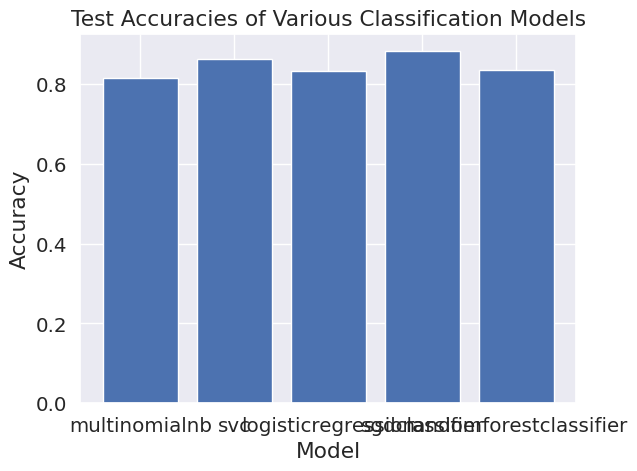

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train_res, y_train_res, test_size=0.15, random_state=0)

# Define a list of classification models to train and evaluate
models = [
    MultinomialNB(),
    SVC(kernel='linear'),
    LogisticRegression(),
    SGDClassifier(loss='hinge', penalty='l2'),
    RandomForestClassifier(n_estimators=100)
]

# Train and evaluate each model
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    model_name = type(model).__name__.lower()
    print(model_name)
    print(classification_report(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("\n")

# Plot the comparison of the test accuracies of each model
names = [type(model).__name__.lower() for model in models]
accuracies = [accuracy_score(y_test, model.predict(X_test)) for model in models]
plt.bar(names, accuracies)
plt.title("Test Accuracies of Various Classification Models")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.show()


# **Grid Search**

# **NB**

Best Parameters: {'alpha': 0.01}
Classification Report:
              precision    recall  f1-score   support

         0.0       0.81      0.93      0.87       155
         1.0       0.94      0.83      0.88       192

    accuracy                           0.87       347
   macro avg       0.87      0.88      0.87       347
weighted avg       0.88      0.87      0.87       347

Accuracy: 0.8731988472622478


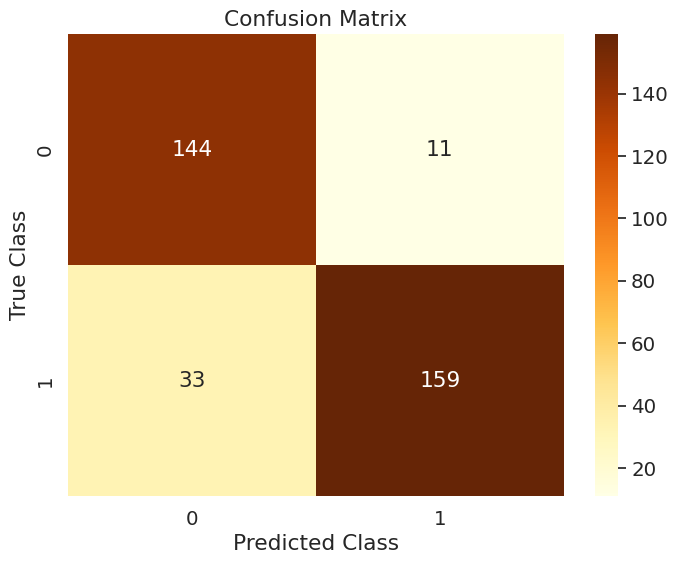

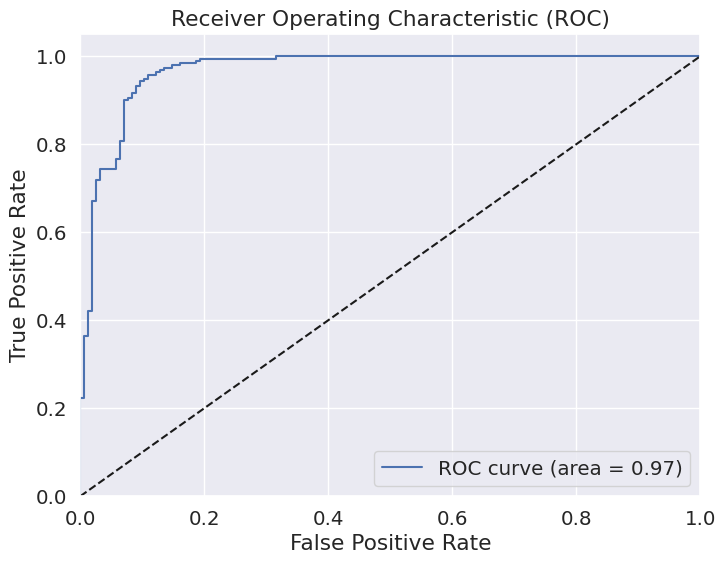

In [68]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
import seaborn as sns

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train_res, y_train_res, test_size=0.15, random_state=0)

# Define the Naive Bayes classifier
nb = MultinomialNB()

# Define the parameter grid for grid search
param_grid = {
    'alpha': [0.01, 0.1, 1]
}

# Perform grid search to find the best parameters
grid_search = GridSearchCV(nb, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best classifier with the optimized parameters
best_nb = grid_search.best_estimator_
best_params = grid_search.best_params_

# Predict the target values for the test set
y_pred = best_nb.predict(X_test)

# Print the best parameters found by grid search
print("Best Parameters:", best_params)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Plot the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlOrBr")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# Calculate the decision function scores or probability estimates for the test set
y_scores = best_nb.predict_proba(X_test)[:, 1]  # Probability estimates for positive class

# Calculate the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = roc_auc_score(y_test, y_scores)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()




# **SVM**

Best Parameters: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.83      0.88       155
         1.0       0.88      0.95      0.91       192

    accuracy                           0.90       347
   macro avg       0.91      0.89      0.90       347
weighted avg       0.90      0.90      0.90       347

Accuracy: 0.899135446685879


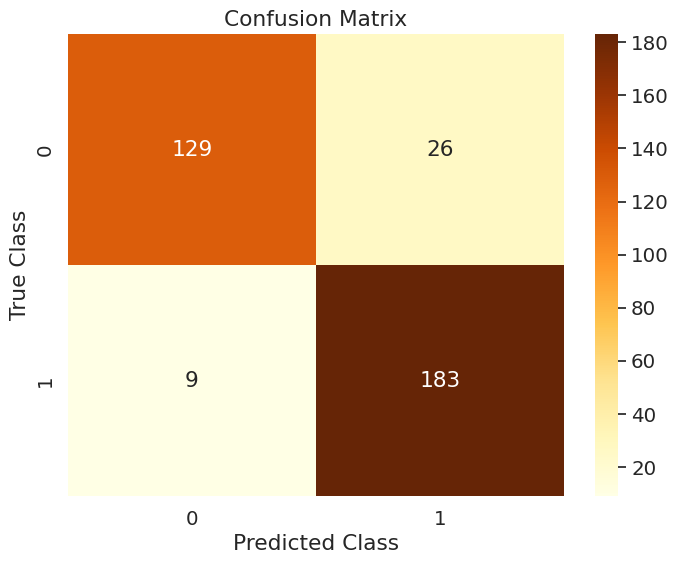

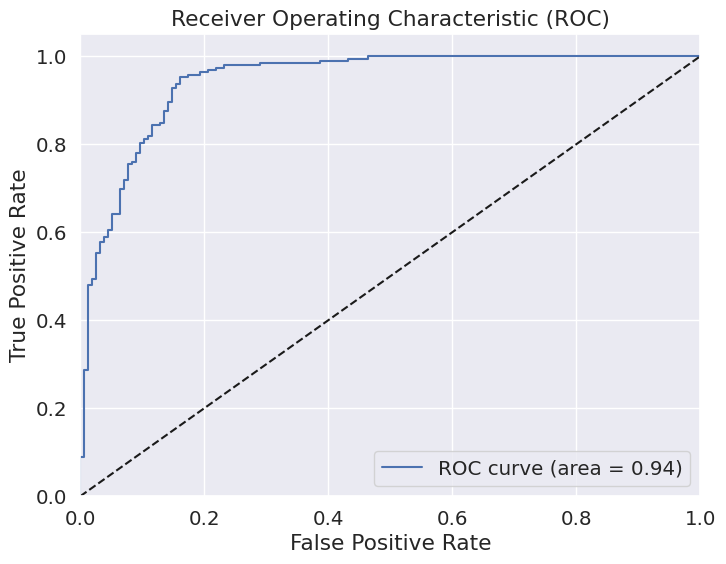

In [69]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train_res, y_train_res, test_size=0.15, random_state=0)

# Define the SVM classifier
svm = SVC()

# Define the parameter grid for grid search
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.1, 1]
}

# Perform grid search to find the best parameters
grid_search = GridSearchCV(svm, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best classifier with the optimized parameters
best_svm = grid_search.best_estimator_
best_params = grid_search.best_params_

# Predict the target values for the test set
y_pred = best_svm.predict(X_test)

# Print the best parameters found by grid search
print("Best Parameters:", best_params)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Plot the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlOrBr")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# Calculate the decision function scores or probability estimates for the test set
y_scores = best_svm.decision_function(X_test)  # Decision function scores

# Calculate the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = roc_auc_score(y_test, y_scores)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


# **LR**

Best Parameters: {'C': 10, 'max_iter': 1000}
Classification Report:
              precision    recall  f1-score   support

         0.0       0.80      0.88      0.84       155
         1.0       0.89      0.82      0.86       192

    accuracy                           0.85       347
   macro avg       0.85      0.85      0.85       347
weighted avg       0.85      0.85      0.85       347

Accuracy: 0.8472622478386167


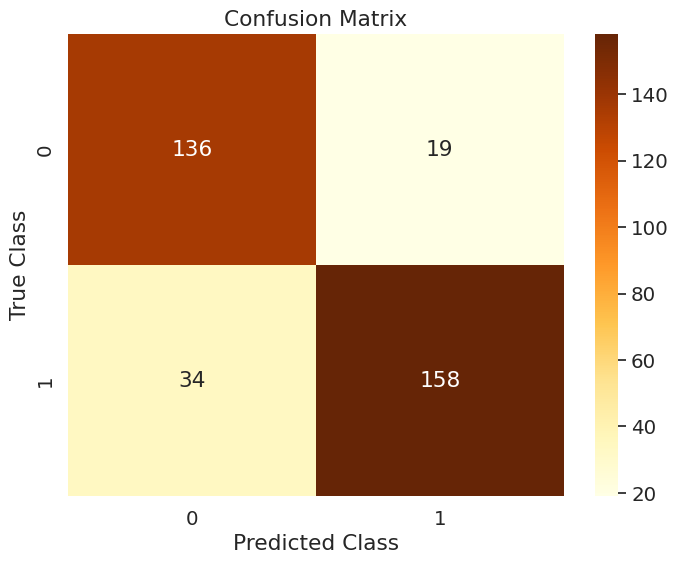

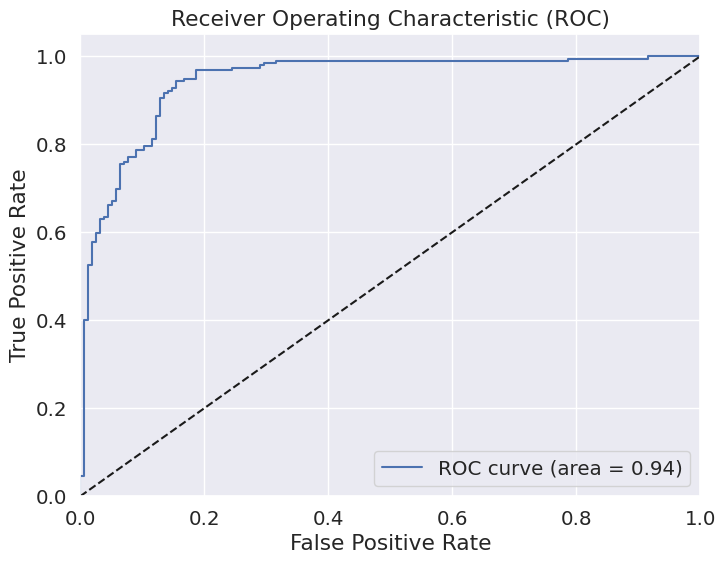

In [70]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train_res, y_train_res, test_size=0.15, random_state=0)

# Define the Logistic Regression classifier
lr = LogisticRegression()

# Define the parameter grid for grid search
param_grid = {
    'C': [0.1, 1, 10],
    'max_iter': [1000, 2000]
}

# Perform grid search to find the best parameters
grid_search = GridSearchCV(lr, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best classifier with the optimized parameters
best_lr = grid_search.best_estimator_
best_params = grid_search.best_params_

# Predict the target values for the test set
y_pred = best_lr.predict(X_test)

# Print the best parameters found by grid search
print("Best Parameters:", best_params)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Plot the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlOrBr")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# Calculate the decision function scores or probability estimates for the test set
y_scores = best_lr.predict_proba(X_test)[:, 1]  # Probability estimates for positive class

# Calculate the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = roc_auc_score(y_test, y_scores)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


# **RF**

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.72      0.80       155
         1.0       0.81      0.94      0.87       192

    accuracy                           0.84       347
   macro avg       0.86      0.83      0.84       347
weighted avg       0.85      0.84      0.84       347

Accuracy: 0.8414985590778098


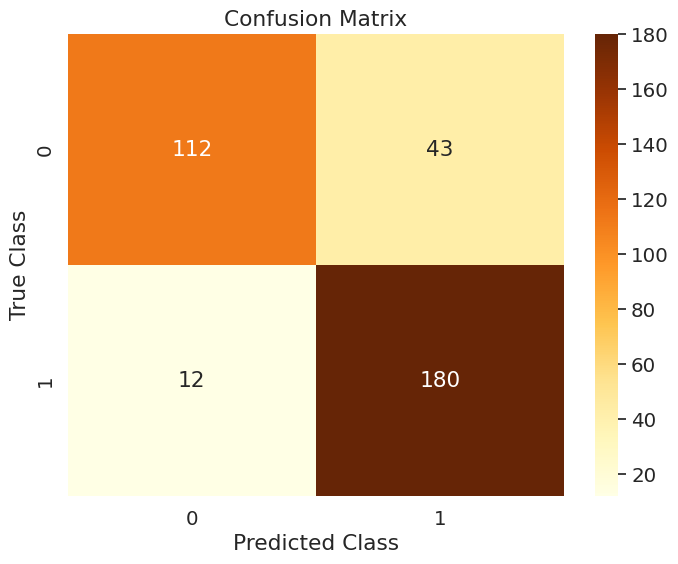

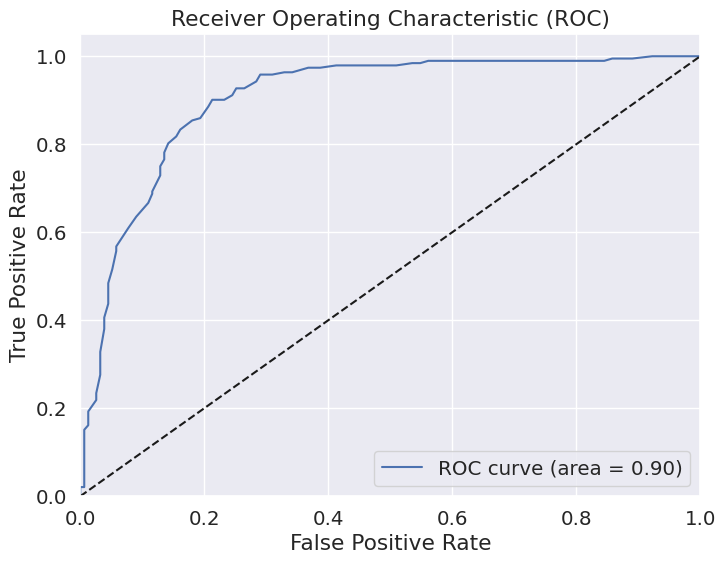

In [71]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train_res, y_train_res, test_size=0.15, random_state=0)

# Define the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100)

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Perform grid search to find the best parameters
grid_search = GridSearchCV(rf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best classifier with the optimized parameters
best_rf = grid_search.best_estimator_
best_params = grid_search.best_params_

# Predict the target values for the test set
y_pred = best_rf.predict(X_test)

# Print the best parameters found by grid search
print("Best Parameters:", best_params)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Plot the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlOrBr")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# Calculate the decision function scores or probability estimates for the test set
y_scores = best_rf.predict_proba(X_test)[:, 1]  # Probability estimates for positive class

# Calculate the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = roc_auc_score(y_test, y_scores)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


# **Random search**

# **NB**

Best Parameters: {'alpha': 0.0010722672220103231}
Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.93      0.88       155
         1.0       0.94      0.85      0.89       192

    accuracy                           0.88       347
   macro avg       0.88      0.89      0.88       347
weighted avg       0.89      0.88      0.89       347

Accuracy: 0.8847262247838616


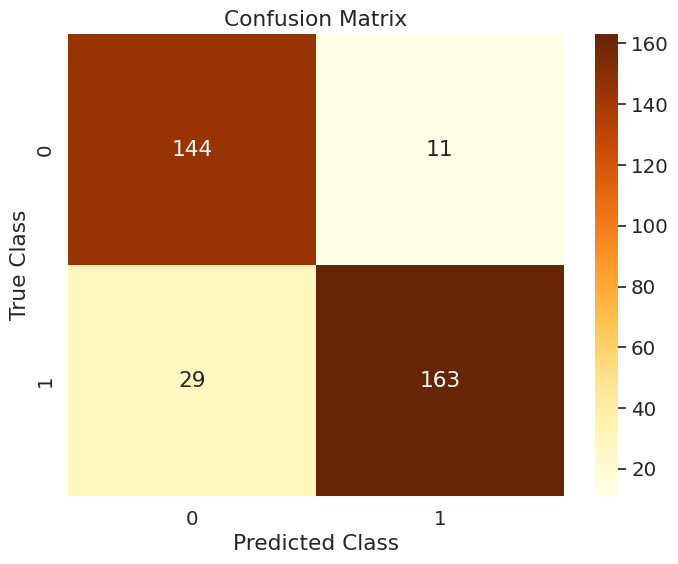

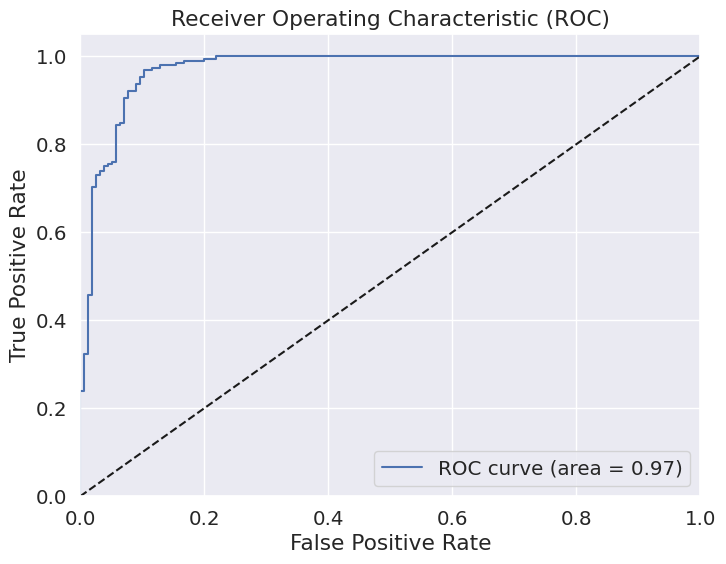

In [72]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.naive_bayes import MultinomialNB
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train_res, y_train_res, test_size=0.15, random_state=0)

# Define the Naive Bayes classifier
nb = MultinomialNB()

# Define the parameter distributions for random search
param_dist = {
    'alpha': np.logspace(-3, 0, 100)
}

# Perform random search to find the best parameters
random_search = RandomizedSearchCV(nb, param_distributions=param_dist, cv=5)
random_search.fit(X_train, y_train)

# Get the best classifier with the optimized parameters
best_nb = random_search.best_estimator_
best_params = random_search.best_params_

# Predict the target values for the test set
y_pred = best_nb.predict(X_test)

# Print the best parameters found by random search
print("Best Parameters:", best_params)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Plot the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlOrBr")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# Calculate the decision function scores or probability estimates for the test set
y_scores = best_nb.predict_proba(X_test)[:, 1]  # Probability estimates for positive class

# Calculate the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = roc_auc_score(y_test, y_scores)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


# **SVM**

Best Parameters: {'gamma': 0.06579332246575682, 'C': 53.366992312063125}
Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.91      0.86       155
         1.0       0.92      0.84      0.88       192

    accuracy                           0.87       347
   macro avg       0.87      0.87      0.87       347
weighted avg       0.88      0.87      0.87       347

Accuracy: 0.8703170028818443


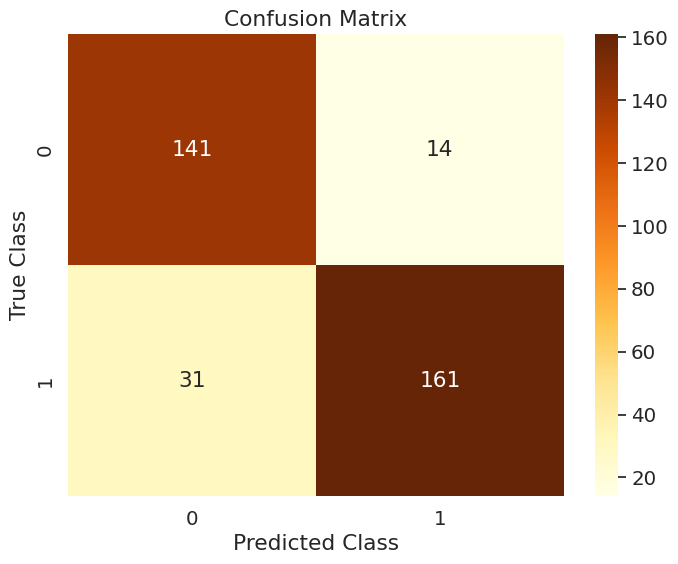

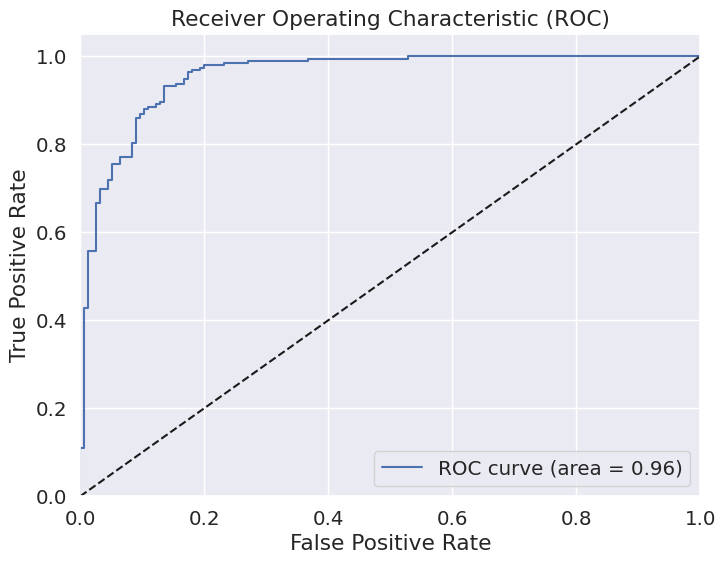

In [73]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train_res, y_train_res, test_size=0.15, random_state=0)

# Define the SVM classifier
svm = SVC()

# Define the parameter distributions for random search
param_dist = {
    'C': np.logspace(-3, 3, 100),
    'gamma': np.logspace(-3, 3, 100)
}

# Perform random search to find the best parameters
random_search = RandomizedSearchCV(svm, param_distributions=param_dist, cv=5)
random_search.fit(X_train, y_train)

# Get the best classifier with the optimized parameters
best_svm = random_search.best_estimator_
best_params = random_search.best_params_

# Predict the target values for the test set
y_pred = best_svm.predict(X_test)

# Print the best parameters found by random search
print("Best Parameters:", best_params)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Plot the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlOrBr")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# Calculate the decision function scores or probability estimates for the test set
y_scores = best_svm.decision_function(X_test)

# Calculate the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = roc_auc_score(y_test, y_scores)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


# **LR**

Best Parameters: {'solver': 'liblinear', 'penalty': 'l2', 'C': 81.11308307896873}
Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.90      0.86       155
         1.0       0.91      0.84      0.87       192

    accuracy                           0.86       347
   macro avg       0.86      0.87      0.86       347
weighted avg       0.87      0.86      0.86       347

Accuracy: 0.8645533141210374


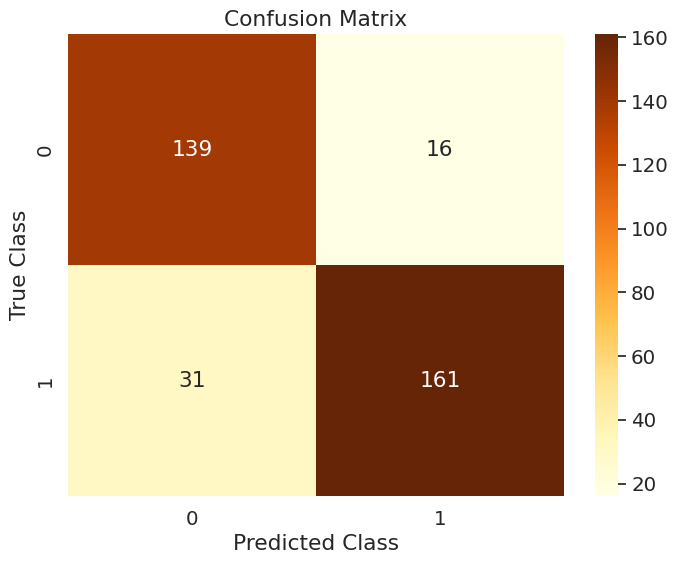

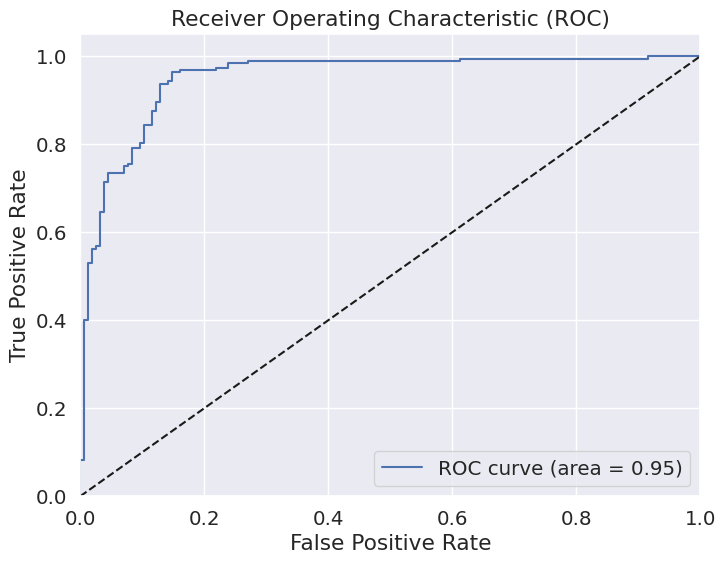

In [74]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train_res, y_train_res, test_size=0.15, random_state=0)

# Define the Logistic Regression classifier
lr = LogisticRegression()

# Define the parameter distributions for random search
param_dist = {
    'C': np.logspace(-3, 3, 100),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

# Perform random search to find the best parameters
random_search = RandomizedSearchCV(lr, param_distributions=param_dist, cv=5)
random_search.fit(X_train, y_train)

# Get the best classifier with the optimized parameters
best_lr = random_search.best_estimator_
best_params = random_search.best_params_

# Predict the target values for the test set
y_pred = best_lr.predict(X_test)

# Print the best parameters found by random search
print("Best Parameters:", best_params)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Plot the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlOrBr")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# Calculate the decision function scores or probability estimates for the test set
y_scores = best_lr.predict_proba(X_test)[:, 1]  # Probability estimates for positive class

# Calculate the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = roc_auc_score(y_test, y_scores)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


# **RF**

Best Parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': None}
Classification Report:
              precision    recall  f1-score   support

         0.0       0.78      0.59      0.67       155
         1.0       0.72      0.86      0.79       192

    accuracy                           0.74       347
   macro avg       0.75      0.73      0.73       347
weighted avg       0.75      0.74      0.73       347

Accuracy: 0.7406340057636888


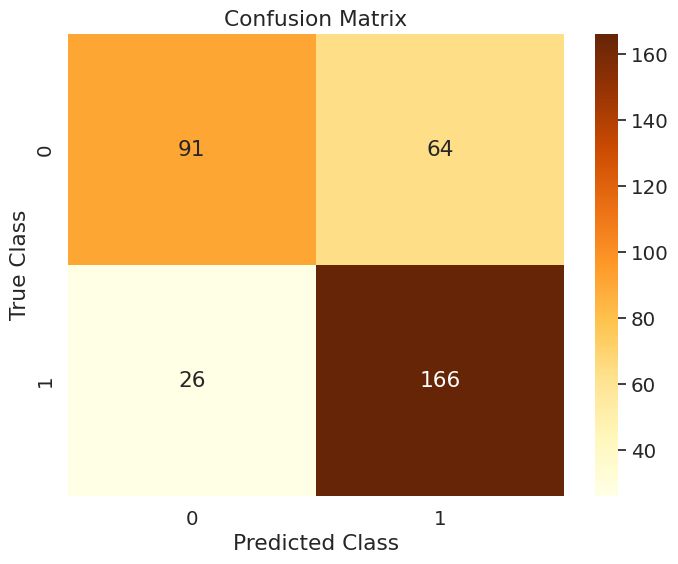

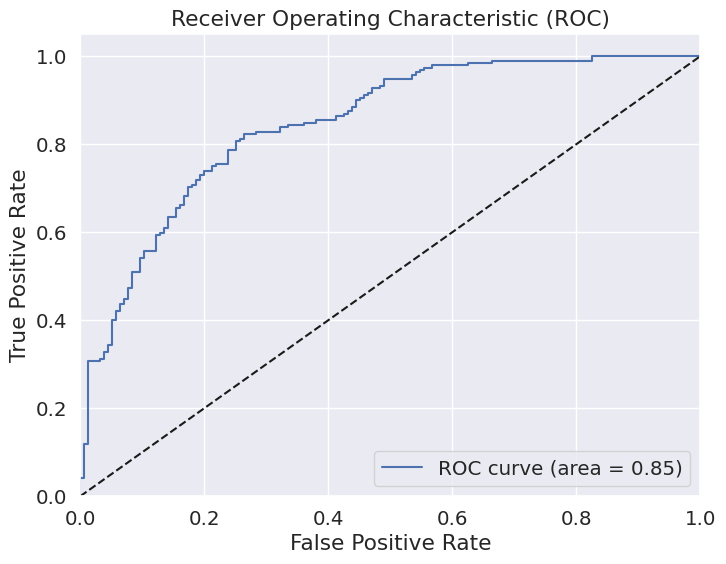

In [75]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train_res, y_train_res, test_size=0.15, random_state=0)

# Define the Random Forest classifier
rf = RandomForestClassifier()

# Define the parameter distributions for random search
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Perform random search to find the best parameters
random_search = RandomizedSearchCV(rf, param_distributions=param_dist, cv=5)
random_search.fit(X_train, y_train)

# Get the best classifier with the optimized parameters
best_rf = random_search.best_estimator_
best_params = random_search.best_params_

# Predict the target values for the test set
y_pred = best_rf.predict(X_test)

# Print the best parameters found by random search
print("Best Parameters:", best_params)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Plot the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlOrBr")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# Calculate the probability estimates for the test set
y_scores = best_rf.predict_proba(X_test)[:, 1]  # Probability estimates for positive class

# Calculate the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = roc_auc_score(y_test, y_scores)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


# **Baysien**

In [76]:
pip install scikit-optimize


Note: you may need to restart the kernel to use updated packages.


# **NB**

Best Parameters: OrderedDict([('alpha', 0.011587082841387868)])
Classification Report:
              precision    recall  f1-score   support

         0.0       0.81      0.93      0.87       155
         1.0       0.94      0.83      0.88       192

    accuracy                           0.87       347
   macro avg       0.87      0.88      0.87       347
weighted avg       0.88      0.87      0.87       347

Accuracy: 0.8731988472622478


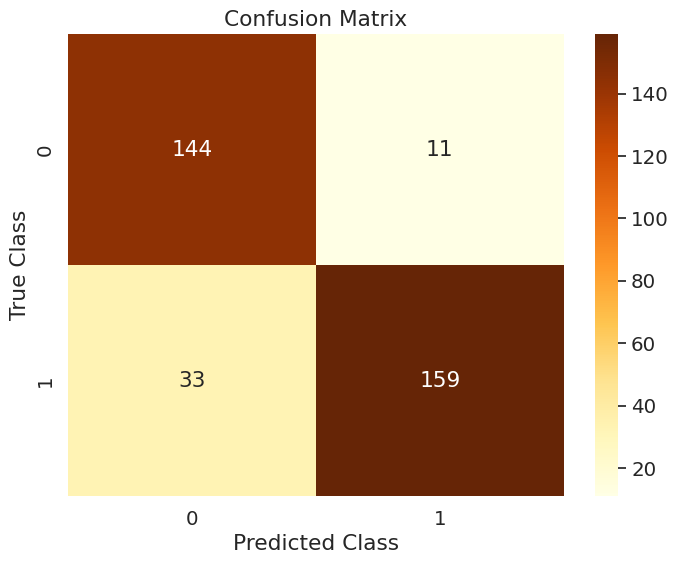

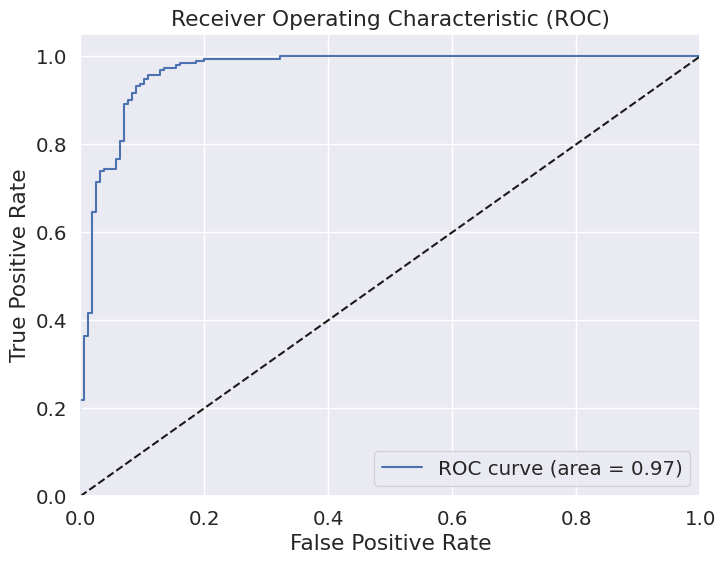

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.naive_bayes import MultinomialNB
from skopt import BayesSearchCV
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train_res, y_train_res, test_size=0.15, random_state=0)

# Define the Naive Bayes classifier
nb = MultinomialNB()

# Define the parameter search space for Bayesian Optimization
param_dist = {
    'alpha': (0.01, 1.0, 'log-uniform')
}

# Perform Bayesian Optimization to find the best parameters
bayes_search = BayesSearchCV(nb, param_dist, cv=5)
bayes_search.fit(X_train, y_train)

# Get the best classifier with the optimized parameters
best_nb = bayes_search.best_estimator_
best_params = bayes_search.best_params_

# Predict the target values for the test set
y_pred = best_nb.predict(X_test)

# Print the best parameters found by Bayesian Optimization
print("Best Parameters:", best_params)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Plot the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlOrBr")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# Calculate the decision function scores or probability estimates for the test set
y_scores = best_nb.predict_proba(X_test)[:, 1]  # Probability estimates for positive class

# Calculate the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = roc_auc_score(y_test, y_scores)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


# **SVM**

Best Parameters: OrderedDict([('C', 1.7204511352188727), ('gamma', 0.7384226310944245)])
Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.84      0.88       155
         1.0       0.88      0.94      0.91       192

    accuracy                           0.89       347
   macro avg       0.90      0.89      0.89       347
weighted avg       0.89      0.89      0.89       347

Accuracy: 0.8933717579250721


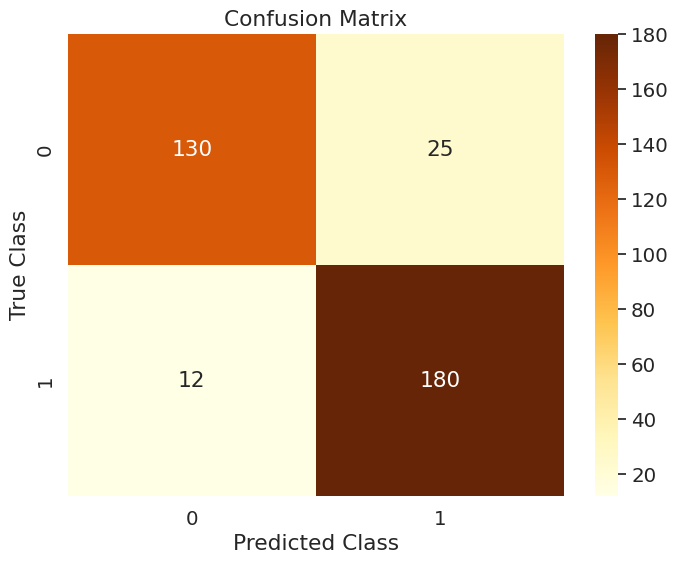

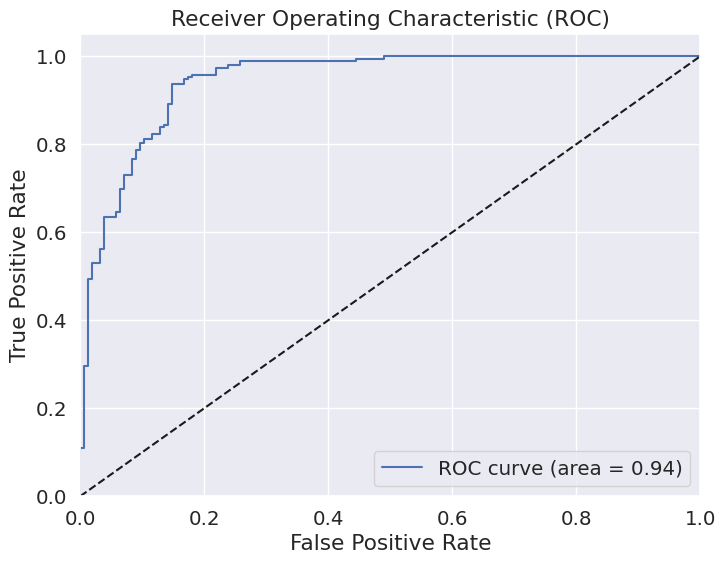

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.svm import SVC
from skopt import BayesSearchCV
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train_res, y_train_res, test_size=0.15, random_state=0)

# Define the SVM classifier
svm = SVC()

# Define the parameter search space for Bayesian Optimization
param_dist = {
    'C': (0.01, 10.0, 'log-uniform'),
    'gamma': (0.001, 1.0, 'log-uniform')
}

# Perform Bayesian Optimization to find the best parameters
bayes_search = BayesSearchCV(svm, param_dist, cv=5)
bayes_search.fit(X_train, y_train)

# Get the best classifier with the optimized parameters
best_svm = bayes_search.best_estimator_
best_params = bayes_search.best_params_

# Predict the target values for the test set
y_pred = best_svm.predict(X_test)

# Print the best parameters found by Bayesian Optimization
print("Best Parameters:", best_params)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Plot the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlOrBr")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# Calculate the decision function scores or probability estimates for the test set
y_scores = best_svm.decision_function(X_test)  # Decision function scores

# Calculate the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = roc_auc_score(y_test, y_scores)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


# **RF**

Best Parameters: OrderedDict([('max_depth', 10), ('min_samples_leaf', 1), ('min_samples_split', 2), ('n_estimators', 1000)])
Classification Report:
              precision    recall  f1-score   support

         0.0       0.74      0.77      0.75       155
         1.0       0.81      0.78      0.79       192

    accuracy                           0.78       347
   macro avg       0.77      0.78      0.77       347
weighted avg       0.78      0.78      0.78       347

Accuracy: 0.7752161383285303


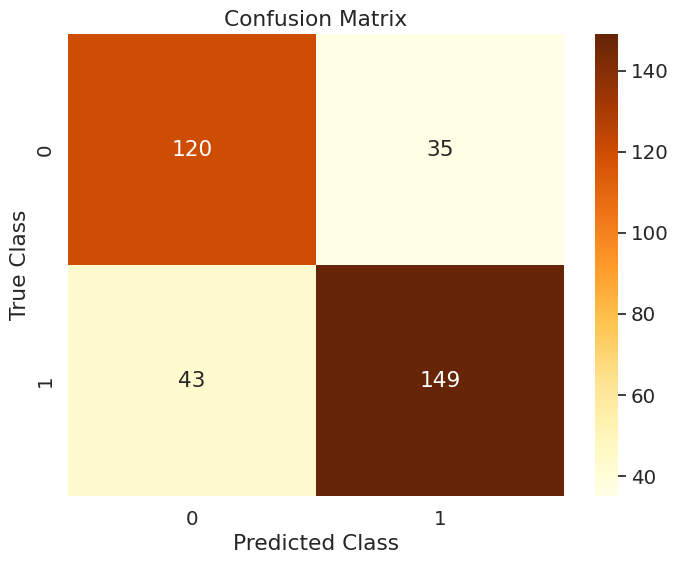

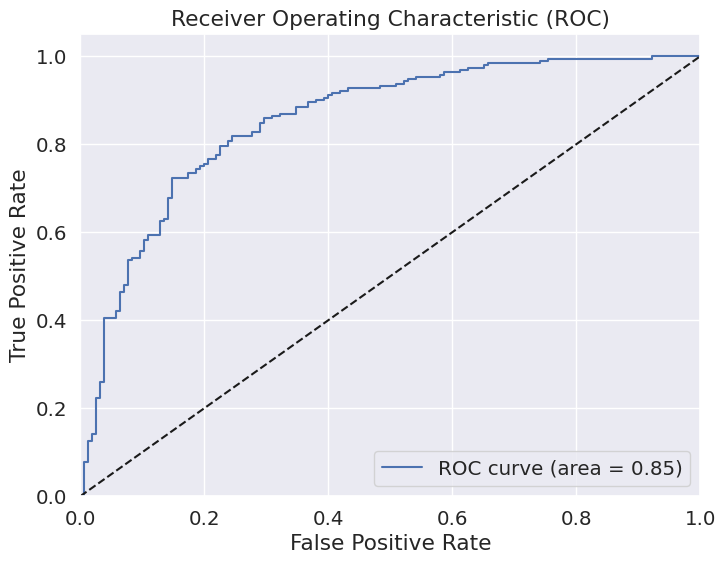

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from skopt import BayesSearchCV

import matplotlib.pyplot as plt
import seaborn as sns

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train_res, y_train_res, test_size=0.15, random_state=0)

# Define the Random Forest classifier
rf = RandomForestClassifier()

# Define the parameter search space for Bayesian Optimization
param_dist = {
    'n_estimators': (100, 1000),
    'max_depth': (1, 10),
    'min_samples_split': (2, 20),
    'min_samples_leaf': (1, 10)
}

# Perform Bayesian Optimization to find the best parameters
bayes_search = BayesSearchCV(rf, param_dist, cv=5)
bayes_search.fit(X_train, y_train)

# Get the best classifier with the optimized parameters
best_rf = bayes_search.best_estimator_
best_params = bayes_search.best_params_

# Predict the target values for the test set
y_pred = best_rf.predict(X_test)

# Print the best parameters found by Bayesian Optimization
print("Best Parameters:", best_params)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Plot the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlOrBr")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# Calculate the decision function scores or probability estimates for the test set
y_scores = best_rf.predict_proba(X_test)[:, 1]  # Probability estimates for positive class

# Calculate the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = roc_auc_score(y_test, y_scores)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


# **LR**

Best Parameters: OrderedDict([('C', 756.463327554629), ('penalty', 'l2'), ('solver', 'liblinear')])
Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.90      0.86       155
         1.0       0.91      0.84      0.88       192

    accuracy                           0.87       347
   macro avg       0.87      0.87      0.87       347
weighted avg       0.87      0.87      0.87       347

Accuracy: 0.8674351585014409


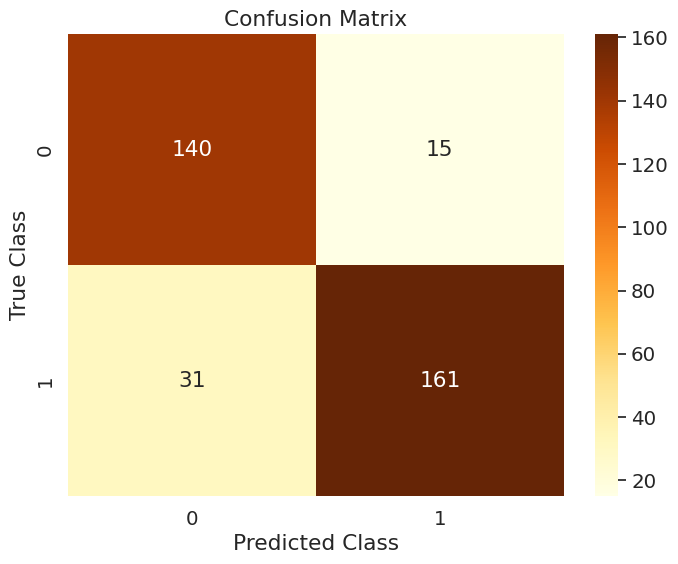

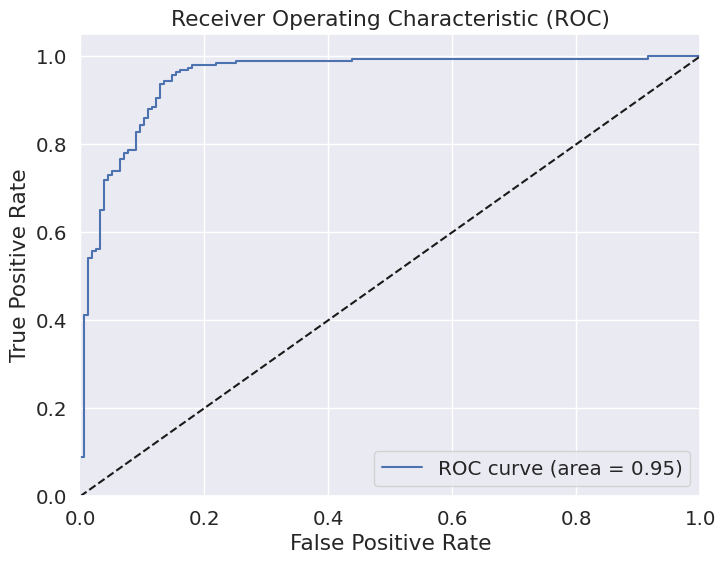

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
import numpy as np
from skopt import BayesSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train_res, y_train_res, test_size=0.15, random_state=0)

# Define the Logistic Regression classifier
lr = LogisticRegression()

# Define the parameter search space for Bayesian Optimization
param_dist = {
    'C': np.logspace(-3, 3, 100),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

# Perform Bayesian Optimization to find the best parameters
bayes_search = BayesSearchCV(lr, param_dist, cv=5)
bayes_search.fit(X_train, y_train)

# Get the best classifier with the optimized parameters
best_lr = bayes_search.best_estimator_
best_params = bayes_search.best_params_

# Predict the target values for the test set
y_pred = best_lr.predict(X_test)

# Print the best parameters found by Bayesian Optimization
print("Best Parameters:", best_params)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Plot the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlOrBr")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# Calculate the decision function scores or probability estimates for the test set
y_scores = best_lr.predict_proba(X_test)[:, 1]  # Probability estimates for positive class

# Calculate the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = roc_auc_score(y_test, y_scores)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()
